# Install Packages

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
pip install shap

# Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Load Dataset

In [ ]:
data = pd.read_csv('/content/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Understanding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Cleaning

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
data.duplicated().sum()

12

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Drop irrelevant features
data.drop(['duration'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

# Data Preprocessing & Analysis

In [ ]:
# Preprocessing: Convert target 'y' to binary (1 = 'yes', 0 = 'no')
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<ipython-input-15-4f0f8c2bfe10>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(feature).agg(


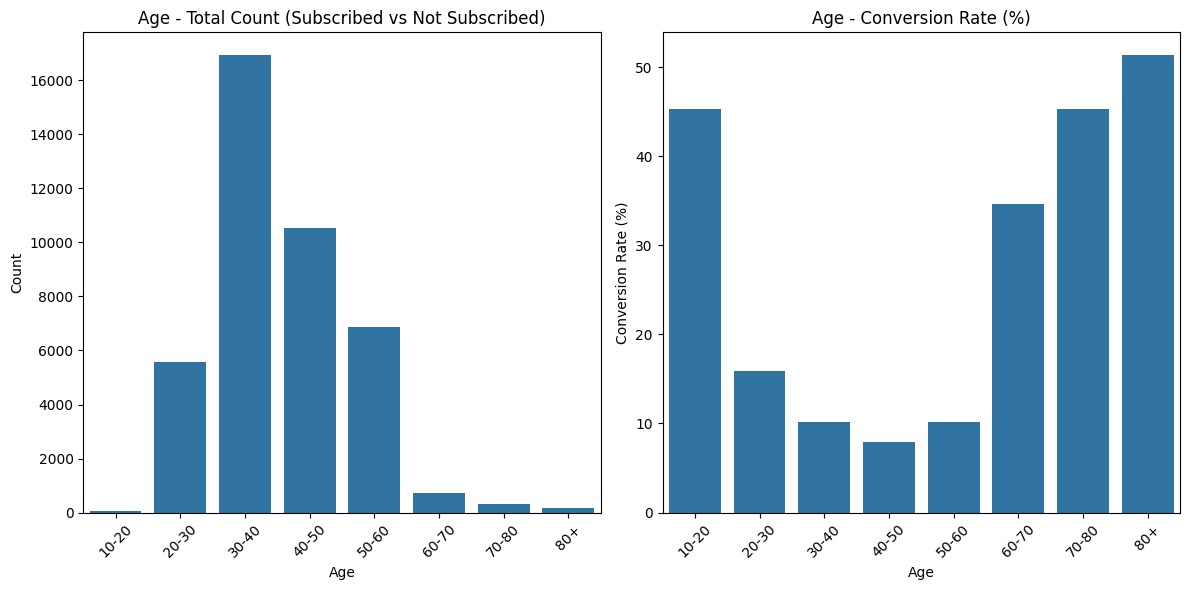

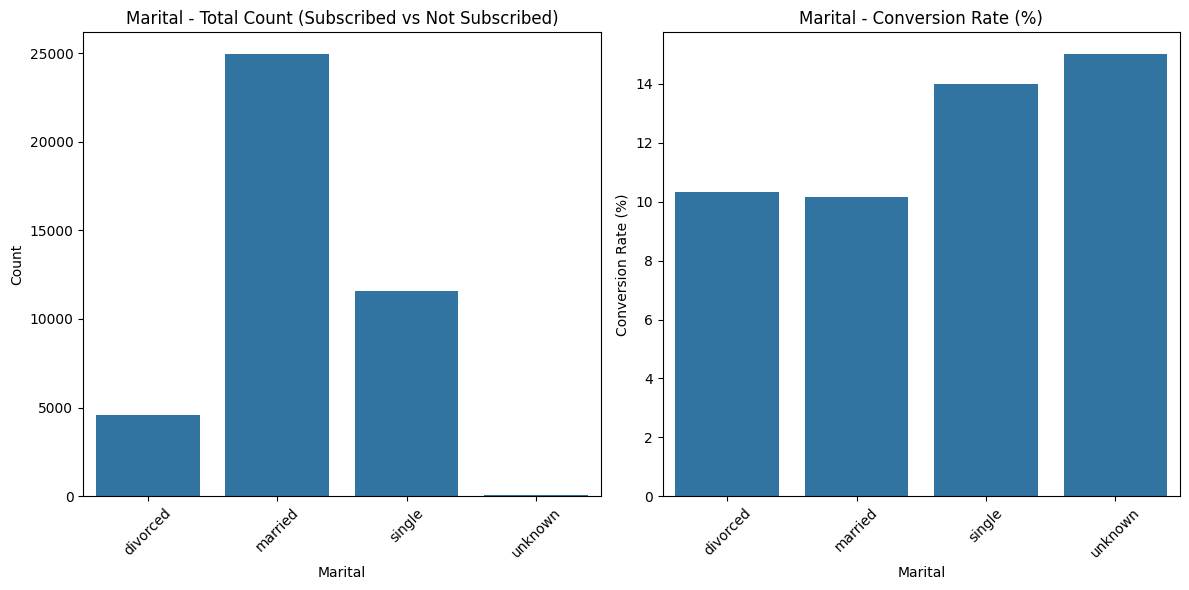

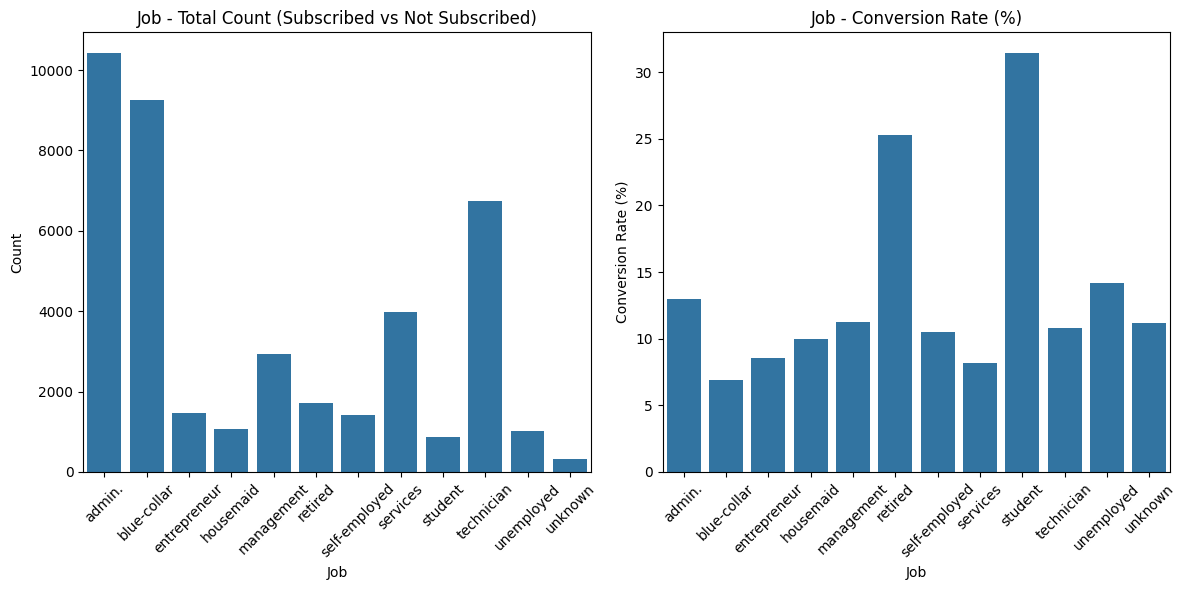

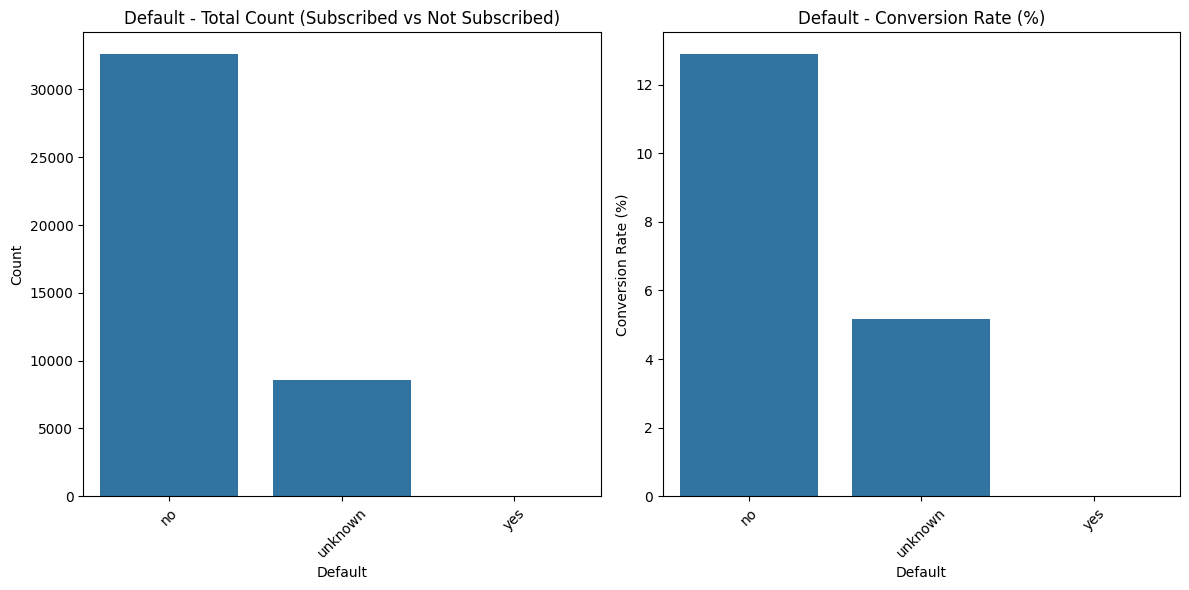

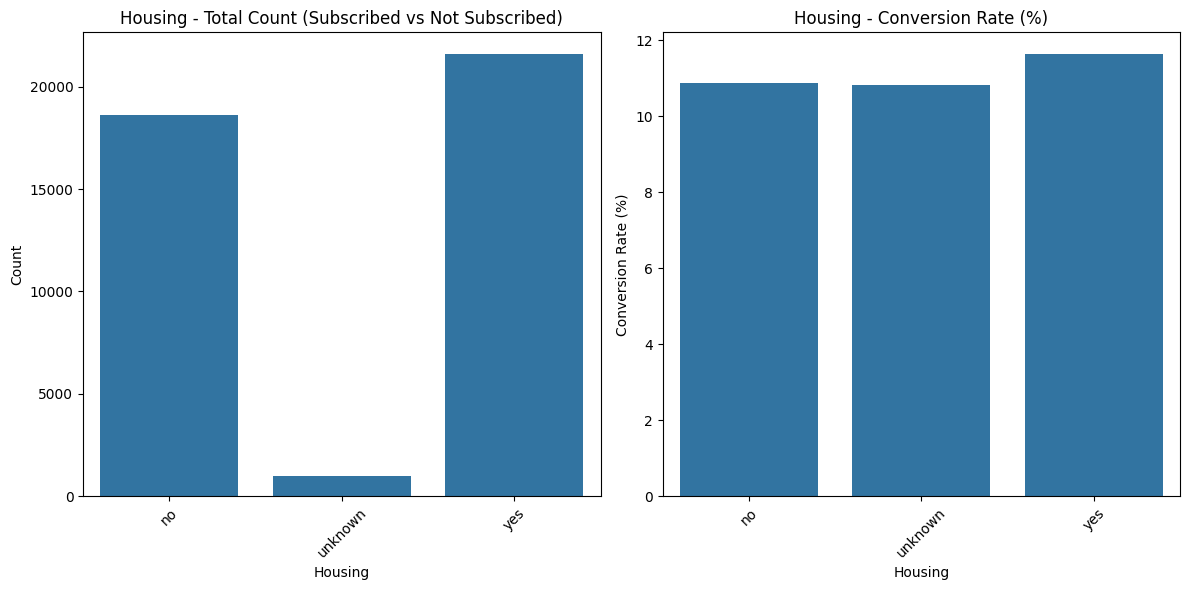

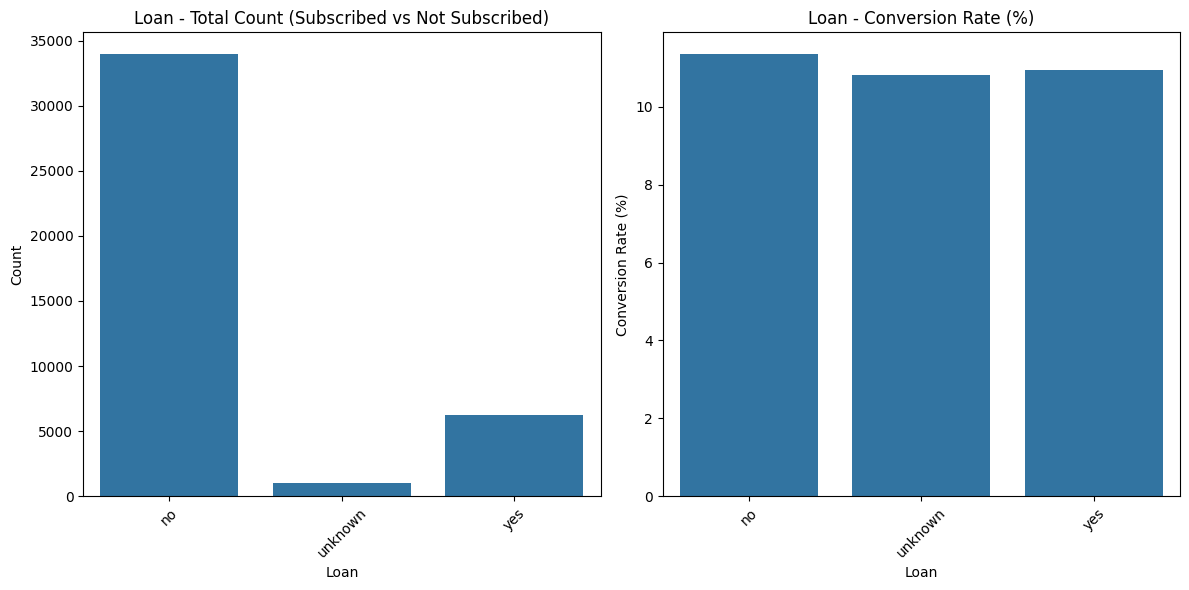

In [ ]:
# Function to calculate conversion rate grouped by feature and target 'y'
def eda_target_analysis(data, feature, target='y'):
    grouped_data = data.groupby(feature).agg(
        Total=('y', 'size'),
        Subscribed=('y', 'sum'),
        NotSubscribed=('y', lambda x: len(x) - sum(x))
    ).reset_index()
    grouped_data['ConversionRate'] = (grouped_data['Subscribed'] / grouped_data['Total']) * 100
    return grouped_data

# Features to analyze
features_to_analyze = ['age', 'marital', 'job', 'default', 'housing', 'loan']

# Generate plots for each feature
for feature in features_to_analyze:
    # Prepare data
    if feature == 'age':
        # For age, binning into ranges for better visualization
        bins = [10, 20, 30, 40, 50, 60, 70, 80, 100]
        labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
        data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
        grouped_data = eda_target_analysis(data, 'age_group')
    else:
        grouped_data = eda_target_analysis(data, feature)

    # Plot grouped data
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot count of subscribed vs not subscribed
    sns.barplot(x=grouped_data[feature if feature != 'age' else 'age_group'],
                y='Total', data=grouped_data, ax=axes[0])
    axes[0].set_title(f'{feature.capitalize()} - Total Count (Subscribed vs Not Subscribed)')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel(feature.capitalize())
    axes[0].tick_params(axis='x', rotation=45)

    # Plot conversion rate
    sns.barplot(x=grouped_data[feature if feature != 'age' else 'age_group'],
                y='ConversionRate', data=grouped_data, ax=axes[1])
    axes[1].set_title(f'{feature.capitalize()} - Conversion Rate (%)')
    axes[1].set_ylabel('Conversion Rate (%)')
    axes[1].set_xlabel(feature.capitalize())
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

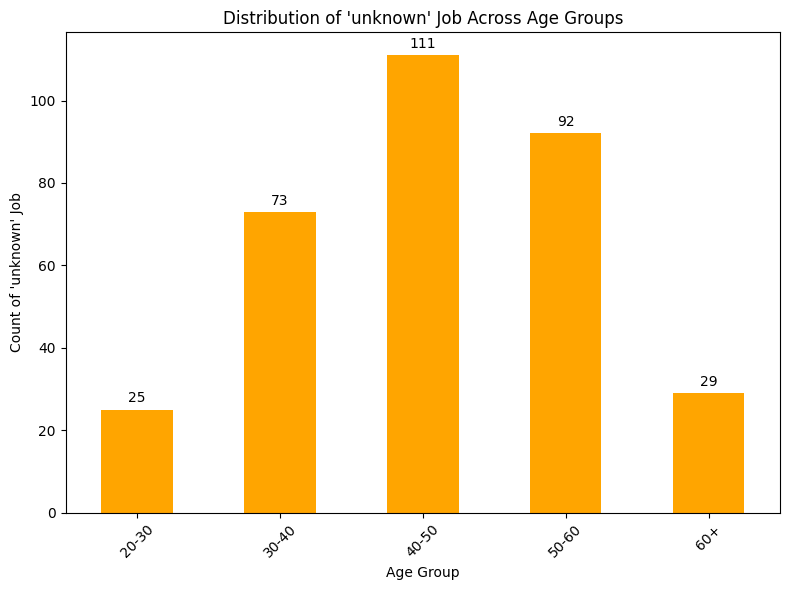

In [ ]:
# Grouping umur
def age_grouping(age):
    if age < 30:
        return '20-30'
    elif age < 40:
        return '30-40'
    elif age < 50:
        return '40-50'
    elif age < 60:
        return '50-60'
    else:
        return '60+'

# Add age group column
data['age_group'] = data['age'].apply(age_grouping)

# Filter data untuk job "unknown"
unknown_job_df = data[data['job'] == 'unknown']

# Grouping by age group untuk job "unknown"
age_group_counts = unknown_job_df['age_group'].value_counts().sort_index()

# Visualisasi
plt.figure(figsize=(8, 6))
bars = age_group_counts.plot(kind='bar', color='orange')
plt.title("Distribution of 'unknown' Job Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count of 'unknown' Job")
plt.xticks(rotation=45)

# Menambahkan nilai di atas bar
for i, count in enumerate(age_group_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

1. Age
  - Grafik Kiri:
  Mayoritas pelanggan berada di kelompok usia 30-40 tahun dan 40-50 tahun.Kelompok usia 20-30 tahun memiliki jumlah pelanggan lebih kecil tetapi cukup signifikan.

  - Grafik Kanan:
  Kelompok usia 60-70 tahun ke atas memiliki tingkat konversi tertinggi (lebih dari 40%). Kelompok usia 10-20 tahun juga menunjukkan tingkat konversi tinggi, meskipun jumlah pelanggan kecil.

  - Insight: Fokuskan kampanye pada kelompok usia 60 tahun ke atas untuk meningkatkan efektivitas.

2. Job
  - Grafik Kiri:
  Pelanggan dengan pekerjaan admin, blue-collar, dan technician mendominasi jumlah data. Kategori seperti student dan retired memiliki jumlah lebih kecil.

  - Grafik Kanan:
  Tingkat konversi tertinggi ditemukan pada kategori pekerjaan student dan retired (lebih dari 25%).

  - Insight: Kampanye dapat difokuskan pada kategori pekerjaan student dan retired karena memiliki peluang konversi lebih besar.

3. Default
  - Grafik Kiri:
  Sebagian besar pelanggan tidak memiliki default (no). Pelanggan dengan status unknown dan yes jauh lebih sedikit.

  - Grafik Kanan:
  Tingkat konversi jauh lebih tinggi untuk pelanggan dengan default no (>12%).

  - Insight: Prioritaskan pelanggan dengan status default no karena peluang konversinya lebih tinggi.

4. Housing
  - Grafik Kiri:
  Pelanggan dengan pinjaman perumahan (yes) dan tanpa pinjaman (no) mendominasi.Kategori unknown hampir tidak signifikan.

  - Grafik Kanan:
  Tingkat konversi cukup seragam di semua kategori (sekitar 10-12%).

  - Insight: Variabel ini tidak menunjukkan pengaruh besar terhadap konversi.

5. Loan
  - Grafik Kiri:
  Sebagian besar pelanggan tidak memiliki pinjaman pribadi (no). Pelanggan dengan pinjaman pribadi (yes) berjumlah sedikit.

  - Grafik Kanan:
  Tingkat konversi cukup seragam di semua kategori (sekitar 10-12%).

  - Insight: Pinjaman pribadi tidak memiliki pengaruh signifikan terhadap konversi.

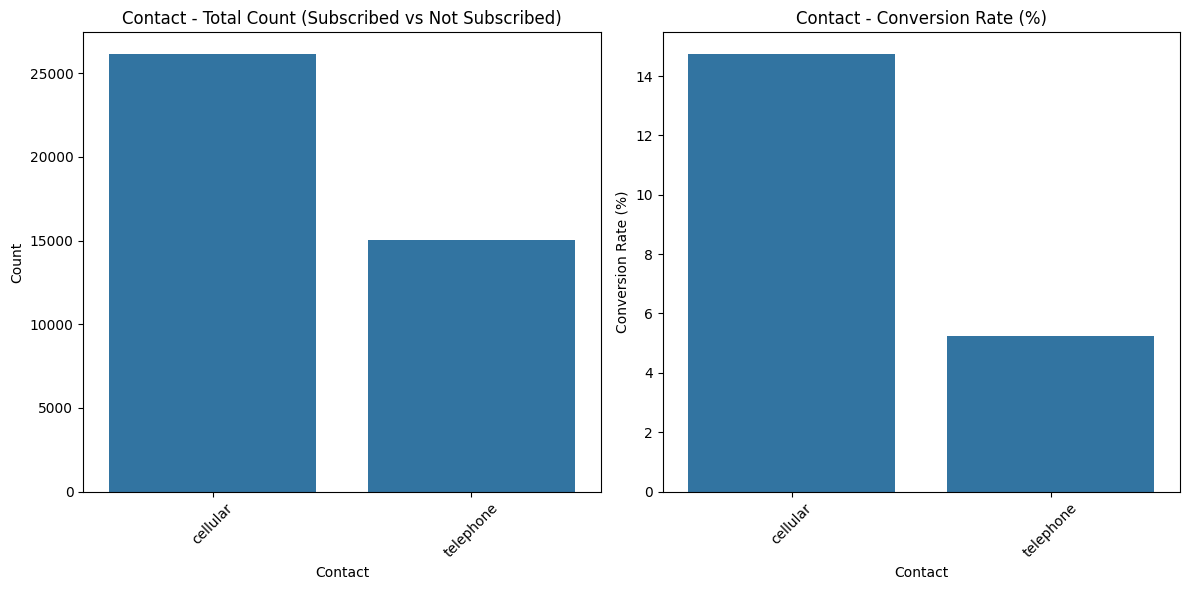

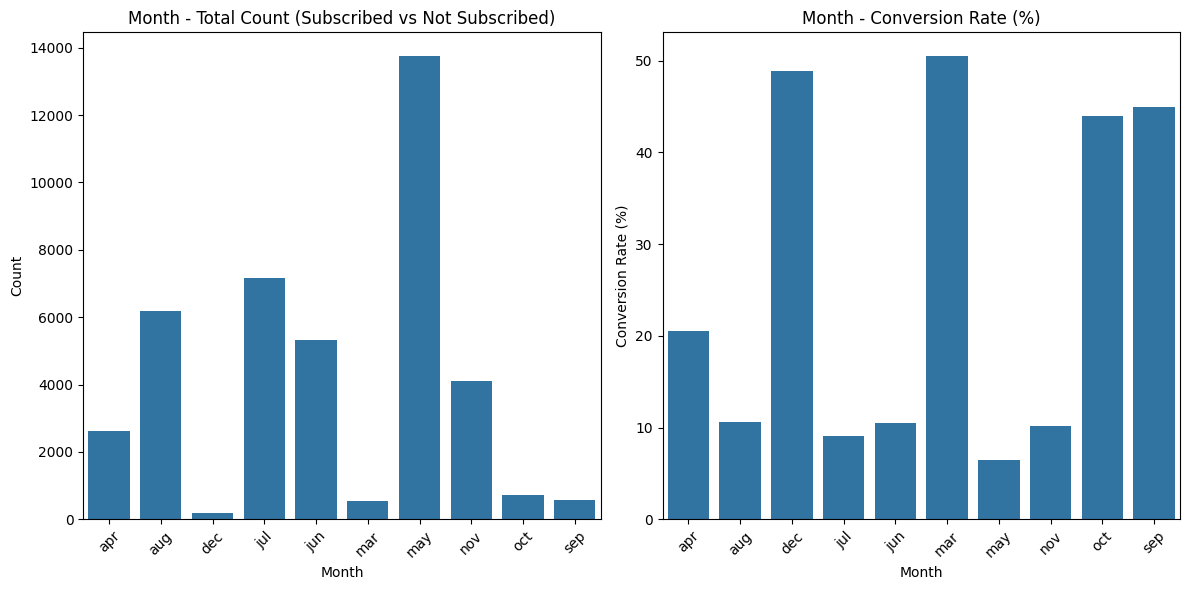

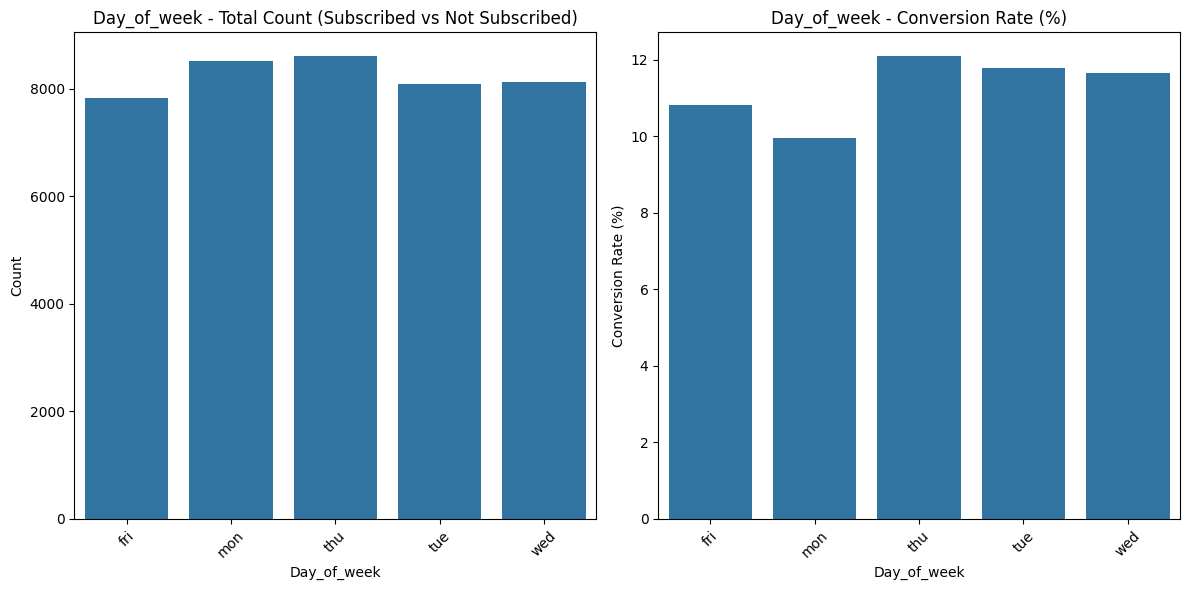

In [ ]:
# Features to analyze
features_to_analyze_2 = ['contact', 'month', 'day_of_week']

# Generate plots for each feature
for feature in features_to_analyze_2:
    # Prepare data
    if feature == 'duration':
        # For duration, binning into ranges for better visualization
        bins = [0, 100, 200, 300, 400, 500, 1000, 2000, data['duration'].max()]
        labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-2000', '2000+']
        data['duration_group'] = pd.cut(data['duration'], bins=bins, labels=labels, right=False)
        grouped_data = eda_target_analysis(data, 'duration_group')
    else:
        grouped_data = eda_target_analysis(data, feature)

    # Plot grouped data
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot count of subscribed vs not subscribed
    sns.barplot(x=grouped_data[feature if feature != 'duration' else 'duration_group'],
                y='Total', data=grouped_data, ax=axes[0])
    axes[0].set_title(f'{feature.capitalize()} - Total Count (Subscribed vs Not Subscribed)')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel(feature.capitalize())
    axes[0].tick_params(axis='x', rotation=45)

    # Plot conversion rate
    sns.barplot(x=grouped_data[feature if feature != 'duration' else 'duration_group'],
                y='ConversionRate', data=grouped_data, ax=axes[1])
    axes[1].set_title(f'{feature.capitalize()} - Conversion Rate (%)')
    axes[1].set_ylabel('Conversion Rate (%)')
    axes[1].set_xlabel(feature.capitalize())
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

1. Month
  - Grafik Kiri:
  Sebagian besar kontak dilakukan pada bulan May, diikuti oleh July dan August.Bulan seperti December, March, dan September memiliki jumlah kontak yang rendah.

  - Grafik Kanan:
  Tingkat konversi tertinggi pada bulan December (>50%), diikuti oleh March, October, dan September. Bulan dengan jumlah kontak tinggi seperti May memiliki tingkat konversi yang lebih rendah.

  - Insight:
  Fokuskan kampanye pada bulan dengan tingkat konversi tinggi seperti December, meskipun jumlah kontaknya lebih sedikit.

2. Day_of_week
  - Grafik Kiri:
  Jumlah kontak hampir merata di seluruh hari kerja dengan sedikit perbedaan. Tuesday, Thursday, dan Monday memiliki jumlah kontak sedikit lebih tinggi dibandingkan hari lainnya.

  - Grafik Kanan:
  Tingkat konversi tertinggi pada Thursday, diikuti oleh Tuesday dan Wednesday.

  - Insight:
  Melakukan kontak pada Thursday dapat meningkatkan kemungkinan keberhasilan kampanye.

<ipython-input-15-4f0f8c2bfe10>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(feature).agg(


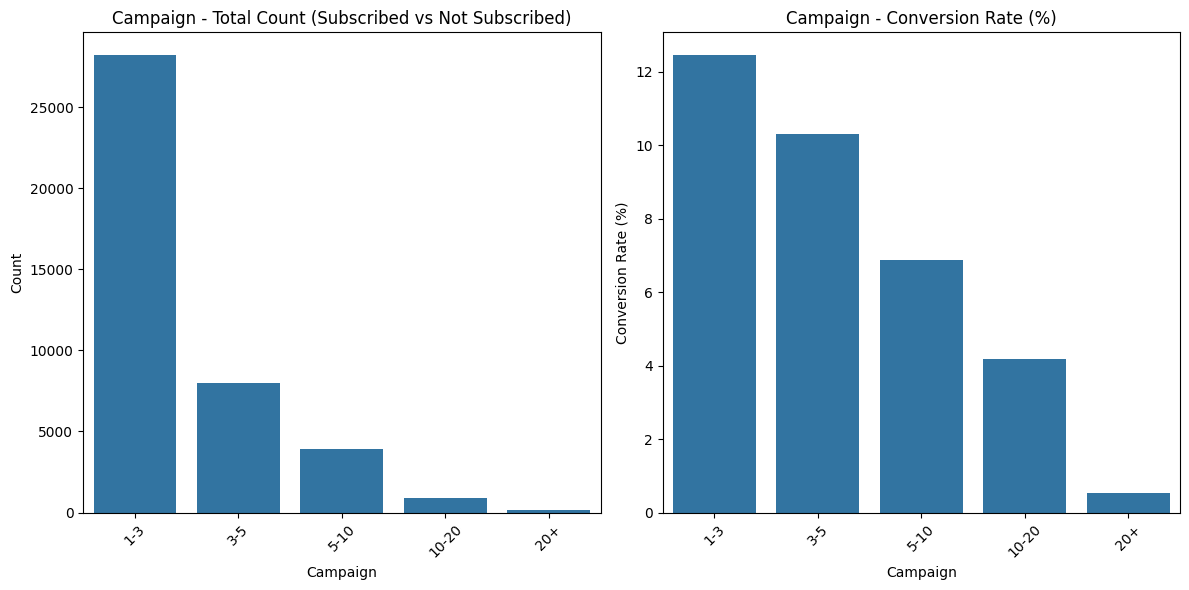

In [ ]:
# Features to analyze
features_to_analyze_3 = ['campaign']

# Generate plots for each feature
for feature in features_to_analyze_3:
    # Prepare data
    if feature == 'campaign':
        # For campaign, binning into ranges for better visualization
        bins = [1, 3, 5, 10, 20, data['campaign'].max()]
        labels = ['1-3', '3-5', '5-10', '10-20', '20+']
        data['campaign_group'] = pd.cut(data['campaign'], bins=bins, labels=labels, right=False)
        grouped_data = eda_target_analysis(data, 'campaign_group')

    # Plot grouped data
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot count of subscribed vs not subscribed
    sns.barplot(x=grouped_data[feature if feature not in ['campaign'] else f'{feature}_group'],
                y='Total', data=grouped_data, ax=axes[0])
    axes[0].set_title(f'{feature.capitalize()} - Total Count (Subscribed vs Not Subscribed)')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel(feature.capitalize())
    axes[0].tick_params(axis='x', rotation=45)

    # Plot conversion rate
    sns.barplot(x=grouped_data[feature if feature not in ['campaign'] else f'{feature}_group'],
                y='ConversionRate', data=grouped_data, ax=axes[1])
    axes[1].set_title(f'{feature.capitalize()} - Conversion Rate (%)')
    axes[1].set_ylabel('Conversion Rate (%)')
    axes[1].set_xlabel(feature.capitalize())
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


1. Campaign
  -  Grafik Kiri:
  Sebagian besar kontak dilakukan 1-3 kali untuk satu pelanggan.
  Jumlah pelanggan menurun signifikan dengan meningkatnya jumlah kontak (misalnya, 10-20 atau lebih dari 20 kontak).

  - Grafik Kanan:
  Tingkat konversi tertinggi terdapat pada pelanggan yang dihubungi sebanyak 1-3 kali. Semakin sering pelanggan dihubungi, tingkat konversi cenderung menurun.

  - Insight:
  Hindari menghubungi pelanggan terlalu sering, karena tingkat konversi menurun drastis dengan meningkatnya jumlah kontak.


In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,campaign_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-60,1-3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-60,1-3
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30-40,1-3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,40-50,1-3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-60,1-3


In [ ]:
data_client = data.iloc[: , 0:7]
data_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [ ]:
data_client['marital'] = data_client['marital'].replace('unknown', 'married')

In [ ]:
data_client['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
# Label encoder order is alphabetical

labelencoder_X = LabelEncoder()
data_client['job']      = labelencoder_X.fit_transform(data_client['job'])
data_client['marital']  = labelencoder_X.fit_transform(data_client['marital'])
data_client['education']= labelencoder_X.fit_transform(data_client['education'])
data_client['default']  = labelencoder_X.fit_transform(data_client['default'])
data_client['housing']  = labelencoder_X.fit_transform(data_client['housing'])
data_client['loan']     = labelencoder_X.fit_transform(data_client['loan'])

In [ ]:
#function to creat group of ages
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4

    return dataframe

age(data_client);

In [ ]:
data_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [ ]:
data_related = data.iloc[: , 7:10]
data_related.head()

,contact,month,day_of_week
0,telephone,may,mon
1,telephone,may,mon
2,telephone,may,mon
3,telephone,may,mon
4,telephone,may,mon


In [ ]:
labelencoder_X = LabelEncoder()
data_related['contact']     = labelencoder_X.fit_transform(data_related['contact'])
data_related['month']       = labelencoder_X.fit_transform(data_related['month'])
data_related['day_of_week'] = labelencoder_X.fit_transform(data_related['day_of_week'])

In [ ]:
data_related.drop('contact', axis=1, inplace=True)

In [ ]:
data_related.head()

,month,day_of_week
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1


In [ ]:
data_soeco = data.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
data_soeco.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
data_other = data.loc[: , ['campaign', 'pdays', 'previous', 'poutcome']]
data_other.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
data_other['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
data_other['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace=True)

<ipython-input-33-4dddd0aa80fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_other['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace=True)
<ipython-input-33-4dddd0aa80fe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_other['poutcome'].replace(['nonexisten

In [ ]:
data_other['pdays'].value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
data_other.drop('pdays', axis=1, inplace=True)

In [ ]:
data_other.head()

,campaign,previous,poutcome
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


In [ ]:
data_target = data.loc[: , ['y']]
data_target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [ ]:
data_final= pd.concat([data_client, data_related, data_soeco, data_other, data_target], axis = 1)
data_final = data_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                         'month', 'day_of_week', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'previous', 'poutcome', 'y']]
data_final.shape

(41176, 18)

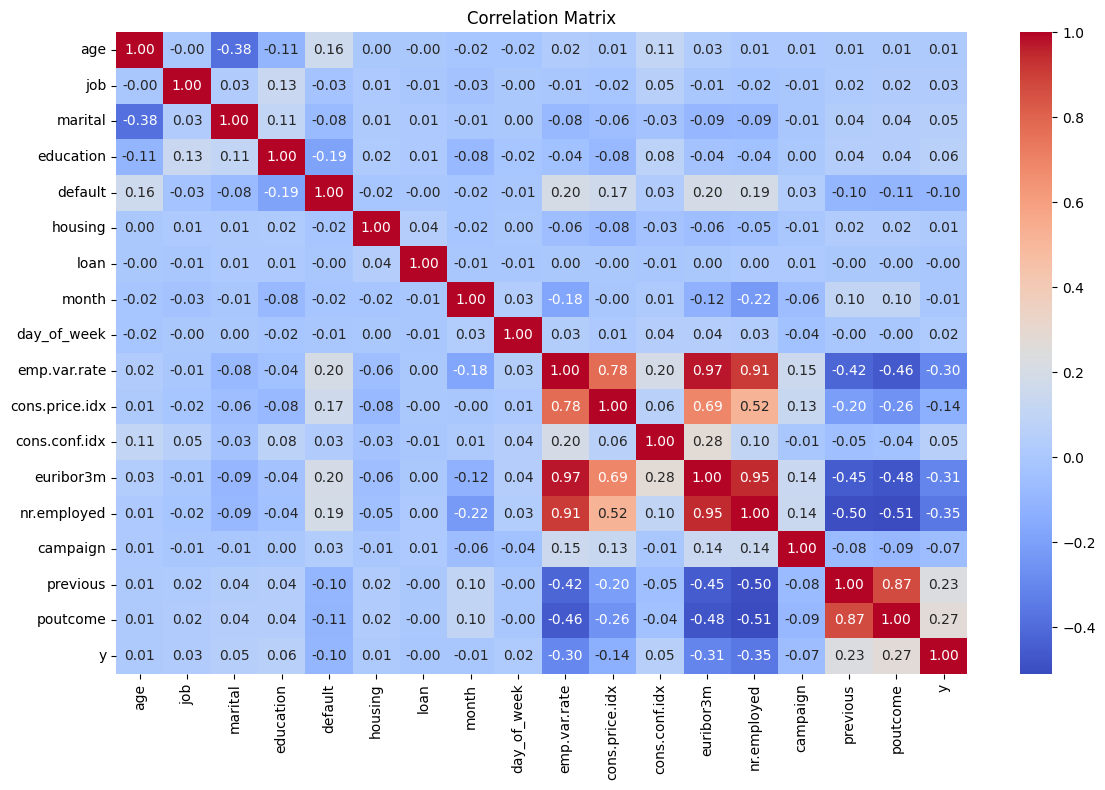

In [ ]:
# Calculate correlation matrix
correlation_matrix = data_final.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Pilih fitur numerik saja, kecuali target 'y'
numeric_features = data_final.drop(columns=['y']).select_dtypes(include=['float64', 'int64'])

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# Tampilkan hasil
print(vif_data)

           Feature           VIF
0              age     10.066567
1              job      2.118804
2          marital      5.647149
3        education      4.424382
4          default      1.395648
5          housing      2.201486
6             loan      1.207827
7            month      6.496976
8      day_of_week      3.078460
9     emp.var.rate     39.788742
10  cons.price.idx  29567.630549
11   cons.conf.idx    129.463993
12       euribor3m    313.245995
13     nr.employed  35271.441346
14        campaign      1.916175
15        previous      4.757227
16        poutcome     32.345130


In [ ]:
vif_data

,Feature,VIF
0,age,10.066567
1,job,2.118804
2,marital,5.647149
3,education,4.424382
4,default,1.395648
5,housing,2.201486
6,loan,1.207827
7,month,6.496976
8,day_of_week,3.078460
9,emp.var.rate,39.788742


In [ ]:
data_final.drop('cons.price.idx', axis=1, inplace=True)

In [ ]:
data_final.drop('nr.employed', axis=1, inplace=True)

In [ ]:
data_final.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,emp.var.rate,cons.conf.idx,euribor3m,campaign,previous,poutcome,y
0,3,3,1,0,0,0,0,6,1,1.1,-36.4,4.857,1,0,1,0
1,3,7,1,3,1,0,0,6,1,1.1,-36.4,4.857,1,0,1,0
2,2,7,1,3,0,2,0,6,1,1.1,-36.4,4.857,1,0,1,0
3,2,0,1,1,0,0,0,6,1,1.1,-36.4,4.857,1,0,1,0
4,3,7,1,3,0,0,2,6,1,1.1,-36.4,4.857,1,0,1,0


# Modeling

In [ ]:
# Split into training and testing sets (80% train, 20% test)
X = data_final.drop('y', axis=1)
y = data_final['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the datasets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32940, 15), (8236, 15), (32940,), (8236,))

## Random Forest Base Model & Evaluation

In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
report = classification_report(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Model Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Random Forest Model Evaluation
Accuracy: 0.8847
ROC AUC Score: 0.7569

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7265
           1       0.52      0.27      0.35       971

    accuracy                           0.88      8236
   macro avg       0.71      0.62      0.65      8236
weighted avg       0.86      0.88      0.87      8236



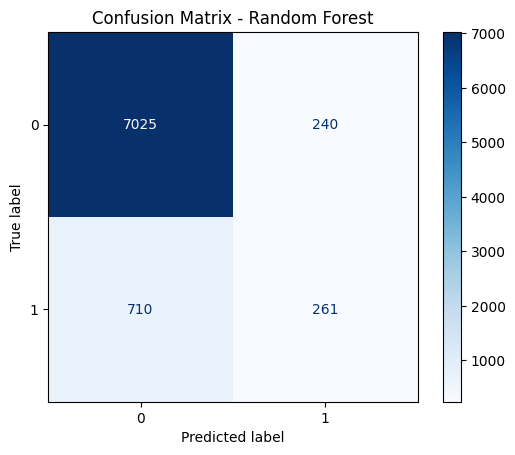

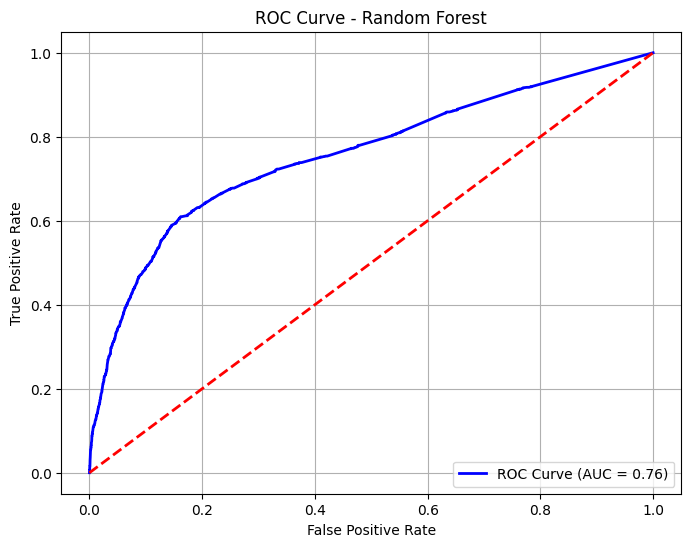

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()

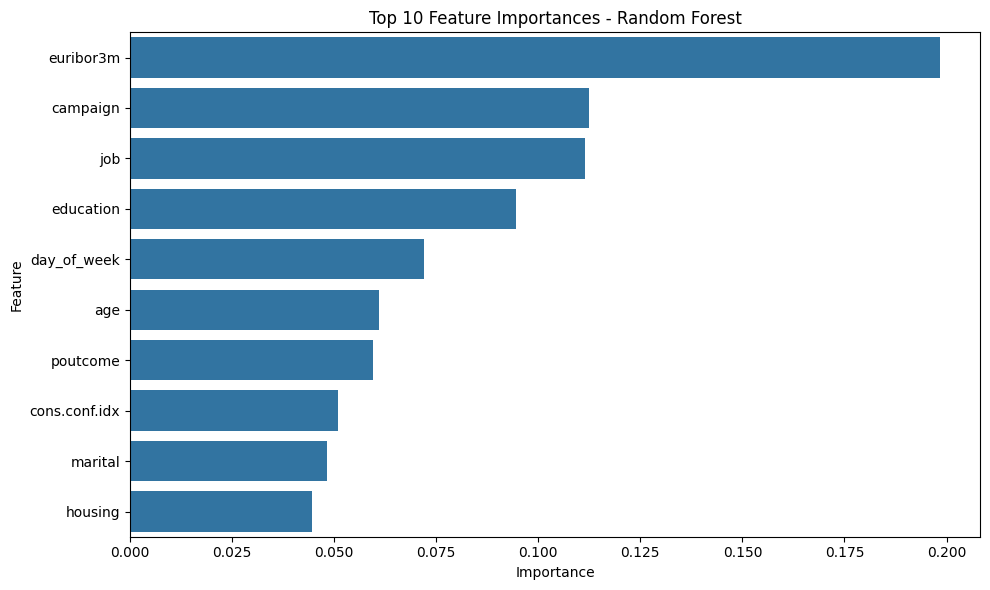

In [ ]:
# Feature importance from Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model
  - Accuracy: 88.47%
  Model memprediksi dengan benar sekitar 88% dari data uji.
  - ROC AUC Score: 75.69%
  Indikator yang menunjukkan kemampuan model untuk membedakan antara kelas positif dan negatif.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 91%.
    Kelas 1 (berlangganan): 52%.
    - Recall:
    Kelas 0: 97% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 27% (relatif rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 94%
    Kelas 1: 35%

2. Confusion Matrix
  - Interpretasi:
    - True Negatives (TN): 7025 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 240 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 710 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 261 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve
  - Interpretasi:
    - Garis biru menunjukkan kinerja model, dengan AUC sebesar 0.75.
    - Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    - AUC sebesar 0.75 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur
  - Top 3 Fitur Penting:
    - euribor3m: Bank dapat memanfaatkan waktu ketika suku bunga rendah untuk memasarkan produk seperti deposito berjangka.
     - campaign: Optimalkan jumlah kontak untuk menghindari kejenuhan pelanggan dan meningkatkan efisiensi kampanye.
    - job: Segmentasikan kampanye pemasaran berdasarkan jenis pekerjaan untuk meningkatkan konversi.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
RFCV = (cross_val_score(rf_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [ ]:
RFCV

0.8908318154219794

## Gradient Boosting Base Model & Evaluation

In [ ]:
# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
report_gb = classification_report(y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting Model Evaluation")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"ROC AUC Score: {roc_auc_gb:.4f}")
print("\nClassification Report:")
print(report_gb)

Gradient Boosting Model Evaluation
Accuracy: 0.8967
ROC AUC Score: 0.7950

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.71      0.21      0.32       971

    accuracy                           0.90      8236
   macro avg       0.81      0.60      0.63      8236
weighted avg       0.88      0.90      0.87      8236



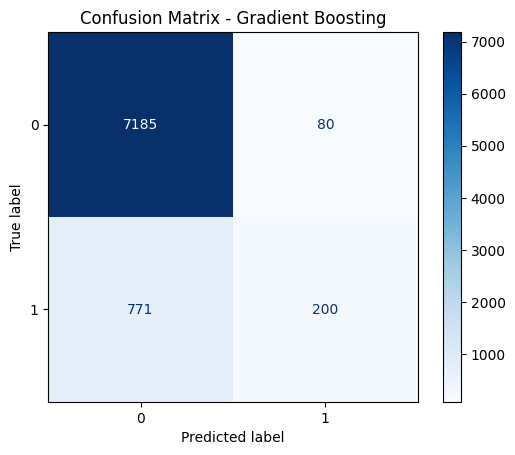

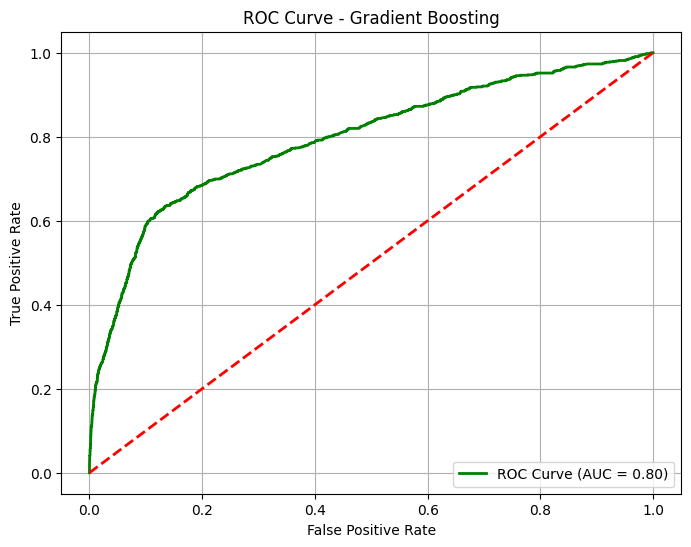

In [ ]:
# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb, display_labels=gb_model.classes_)
disp_gb.plot(cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

# ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

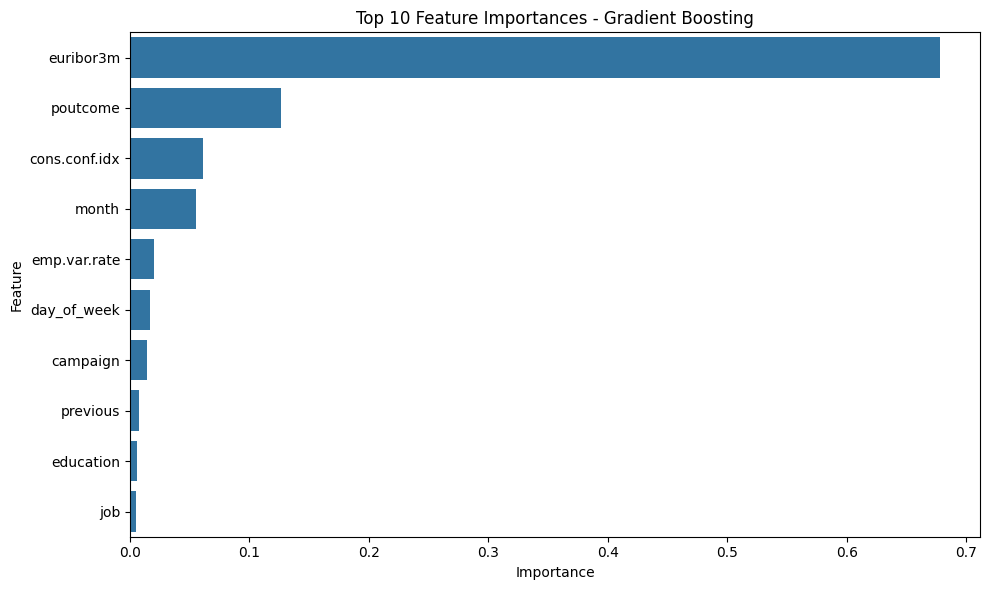

In [ ]:
# Feature importance from Gradient Boosting
gb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
gb_feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance.head(10))
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model
  - Accuracy: 89.67%
  Model memprediksi dengan benar sekitar 89% dari data uji.
  - ROC AUC Score: 79.50%
  Model memiliki kemampuan yang cukup baik untuk membedakan antara kelas 0 dan 1.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 90%.
    Kelas 1 (berlangganan): 71%.
    - Recall:
    Kelas 0: 99% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 21% (rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 94%
    Kelas 1: 32%


2. Confusion Matrix
  - Interpretasi:
    - True Negatives (TN): 7185 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 80 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 771 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 200 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve
  - Interpretasi:
    - Garis hijau menunjukkan kinerja model, dengan AUC sebesar 0.79.
    - Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    - AUC sebesar 0.79 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur
  - Top 3 Fitur Penting:
    - euribor3m: Kampanye lebih efektif saat suku bunga rendah, karena pelanggan merasa lebih aman untuk berinvestasi.
    - poutcome: Fokuskan kampanye pada pelanggan yang memiliki hasil positif (success) pada kampanye sebelumnya.
    - cons.conf.idx: Kampanye sebaiknya dilakukan saat indeks kepercayaan konsumen stabil atau meningkat.

In [ ]:
GBCV = (cross_val_score(gb_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GBCV

0.9010321797207045

## Light Gradient Boosting Base Model + Evaluation

In [ ]:
# Train a LightGBM model
lgbm_model = LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMClassifier(max_depth=3, random_state=42)

In [ ]:
# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
report_lgbm = classification_report(y_test, y_pred_lgbm)

# Print evaluation metrics
print("LightGBM Model Evaluation")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"ROC AUC Score: {roc_auc_lgbm:.4f}")
print("\nClassification Report:")
print(report_lgbm)

LightGBM Model Evaluation
Accuracy: 0.8963
ROC AUC Score: 0.7958

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.70      0.21      0.32       971

    accuracy                           0.90      8236
   macro avg       0.80      0.60      0.63      8236
weighted avg       0.88      0.90      0.87      8236



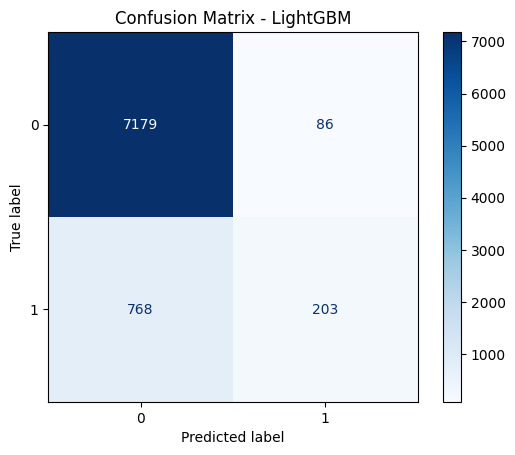

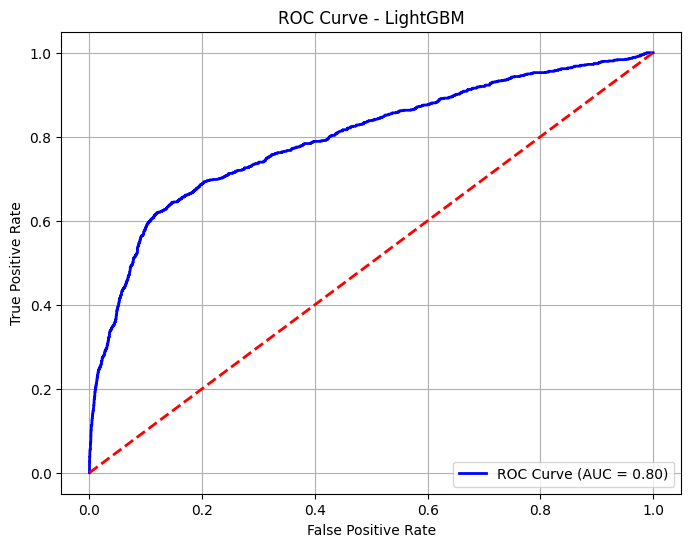

In [ ]:
# Confusion Matrix for LightGBM
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm, display_labels=lgbm_model.classes_)
disp_lgbm.plot(cmap='Blues')
plt.title('Confusion Matrix - LightGBM')
plt.show()

# ROC Curve for LightGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

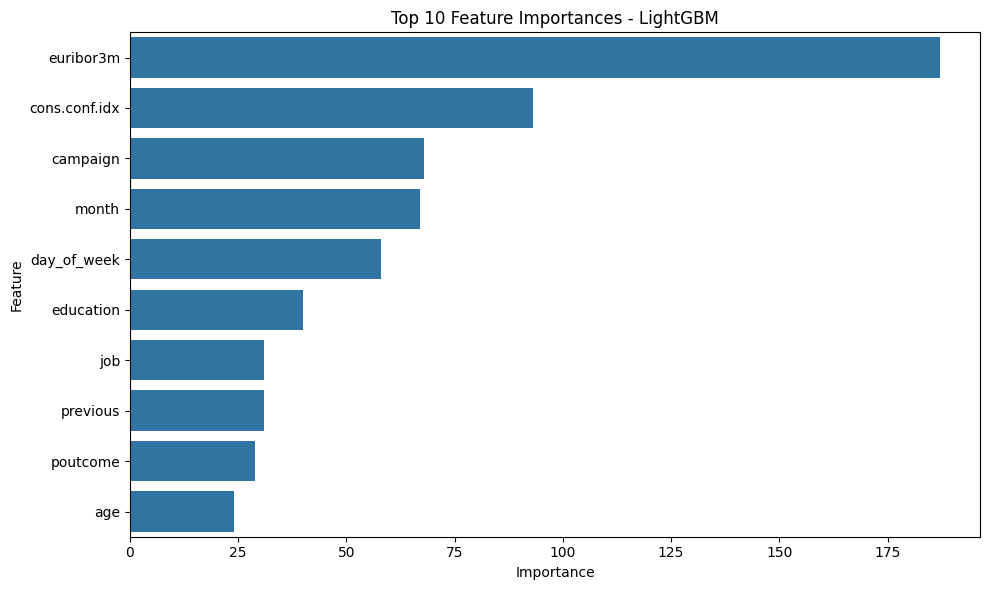

In [ ]:
# Feature importance from LightGBM
lgbm_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
lgbm_feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importance.head(10))
plt.title('Top 10 Feature Importances - LightGBM')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model
  - Accuracy: 89.63%
  Model memprediksi dengan benar sekitar 89% dari data uji.
  - ROC AUC Score: 79.58%
  Model memiliki kemampuan yang cukup baik untuk membedakan antara kelas 0 dan 1.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 90%.
    Kelas 1 (berlangganan): 70%.
    - Recall:
    Kelas 0: 99% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 21% (rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 94%
    Kelas 1: 32%

2. Confusion Matrix
  - Interpretasi:
    - True Negatives (TN): 7179 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 86 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 768 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 203 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve
  - Interpretasi:
    - Garis biru menunjukkan kinerja model, dengan AUC sebesar 0.79.
    - Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    - AUC sebesar 0.79 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur
  - Top 3 Fitur Penting:
    - euribor3m: Bank dapat meningkatkan peluang keberhasilan kampanye saat suku bunga rendah.
    - cons.conf.idx: Kampanye sebaiknya dilakukan saat indeks kepercayaan konsumen stabil atau meningkat.
    - campaign: Optimalkan jumlah kontak dengan pelanggan untuk menjaga tingkat keberhasilan.

In [ ]:
LGBMCV = (cross_val_score(lgbm_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
LGBMCV

[LightGBM] [Info] Number of positive: 3318, number of negative: 26328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111921 -> initscore=-2.071271
[LightGBM] [Info] Start training from score -2.071271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

0.9012750455373407

## XGBoost Base Model & Evaluation

In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

# Print evaluation metrics
print("XGBoost Model Evaluation")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")
print("\nClassification Report:")
print(report_xgb)

XGBoost Model Evaluation
Accuracy: 0.8966
ROC AUC Score: 0.7952

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.72      0.20      0.32       971

    accuracy                           0.90      8236
   macro avg       0.81      0.60      0.63      8236
weighted avg       0.88      0.90      0.87      8236



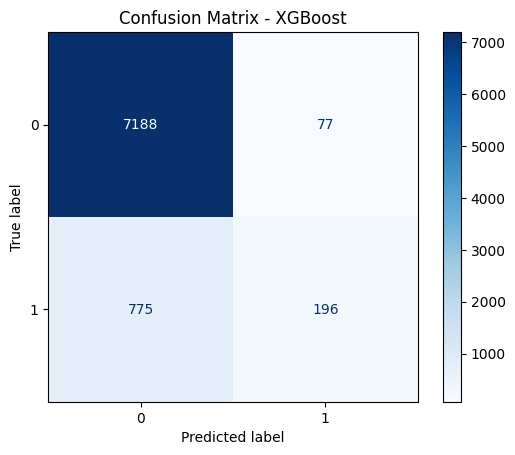

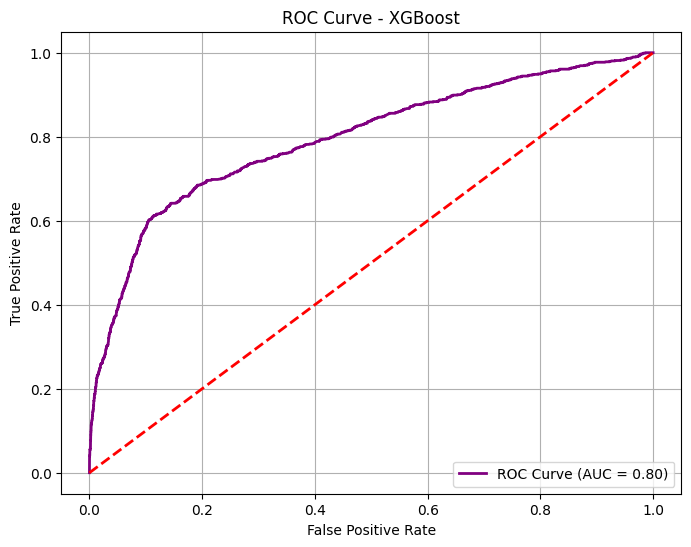

In [ ]:
# Confusion Matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# ROC Curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

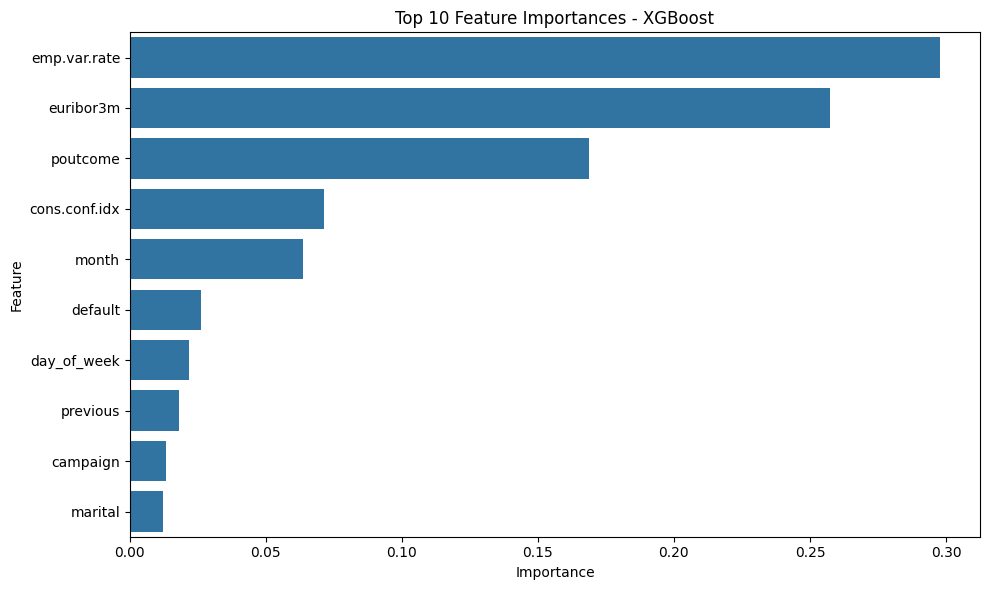

In [ ]:
# Feature importance from XGBoost
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
xgb_feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance.head(10))
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model
  - Accuracy: 89.66%
  Model memprediksi dengan benar sekitar 89% dari data uji.
  - ROC AUC Score: 79.52%
  Model memiliki kemampuan yang cukup baik untuk membedakan antara kelas 0 dan 1.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 90%.
    Kelas 1 (berlangganan): 72%.
    - Recall:
    Kelas 0: 99% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 20% (rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 94%
    Kelas 1: 32%

2. Confusion Matrix
  - Interpretasi:
    - True Negatives (TN): 6815 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 84 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 749 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 190 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve
  - Interpretasi:
    - Garis ungu menunjukkan kinerja model, dengan AUC sebesar 0.79.
    - Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    - AUC sebesar 0.79 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur
  - Top 3 Fitur Penting:
    - emp.var.rate: Bank dapat mengoptimalkan kampanye ketika tingkat variasi pekerjaan positif.
    - euribor3m: Kampanye lebih efektif dilakukan ketika suku bunga Euribor rendah, karena pelanggan merasa lebih aman untuk berinvestasi.
    - poutcome: Fokuskan kampanye pada pelanggan dengan catatan hasil kampanye sebelumnya yang positif.

In [ ]:
XGBCV = (cross_val_score(xgb_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBCV

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:06:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

0.9010625379477839

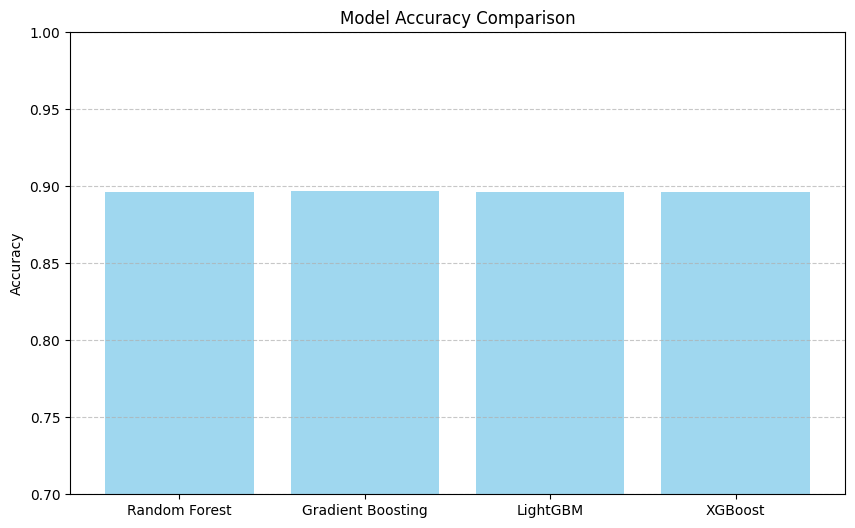

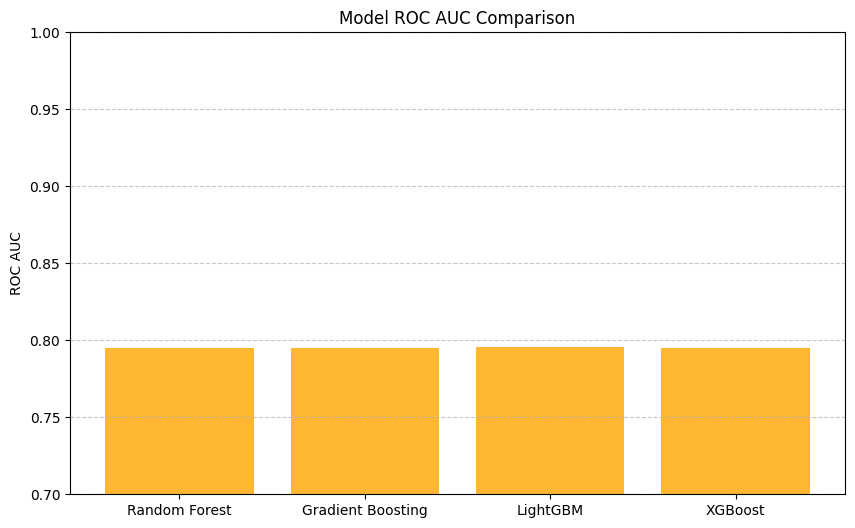

The best model based on ROC AUC is: LightGBM


In [ ]:
# Compile model performance metrics for comparison
model_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_xgb, accuracy_gb, accuracy_lgbm, accuracy_xgb],
    'ROC AUC': [roc_auc_xgb, roc_auc_gb, roc_auc_lgbm, roc_auc_xgb]
})

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_metrics['Model'], model_metrics['Accuracy'], color='skyblue', alpha=0.8)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot ROC AUC Comparison
plt.figure(figsize=(10, 6))
plt.bar(model_metrics['Model'], model_metrics['ROC AUC'], color='orange', alpha=0.8)
plt.title('Model ROC AUC Comparison')
plt.ylabel('ROC AUC')
plt.ylim(0.7, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Select the best model based on ROC AUC
best_model_name = model_metrics.loc[model_metrics['ROC AUC'].idxmax(), 'Model']
print(f"The best model based on ROC AUC is: {best_model_name}")

# Business Insights

In [ ]:
# Prediksi dengan model Gradient Boosting
y_pred_rf = rf_model.predict(X_test)
predicted_positive_rf = (y_pred_rf == 1).sum()

# Prediksi dengan model Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
predicted_positive_gb = (y_pred_gb == 1).sum()

# Prediksi dengan model LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)
predicted_positive_lgbm = (y_pred_lgbm == 1).sum()

# Prediksi dengan model XGBoost
y_pred_xgb = xgb_model.predict(X_test)
predicted_positive_xgb = (y_pred_xgb == 1).sum()

# Simpan hasil dalam DataFrame
results = {
    "Model": ["Random Forest", "Gradient Boosting", "LightGBM", "XGBoost"],
    "Predicted_Positive": [predicted_positive_rf, predicted_positive_gb, predicted_positive_lgbm, predicted_positive_xgb]
}

total_customers = len(X_test)

results["Conversion Rate (%)"] = [
    (predicted_positive_rf / total_customers) * 100,
    (predicted_positive_gb / total_customers) * 100,
    (predicted_positive_lgbm / total_customers) * 100,
    (predicted_positive_xgb / total_customers) * 100
]

df_results = pd.DataFrame(results)
print(df_results)

               Model  Predicted_Positive  Conversion Rate (%)
0      Random Forest                 501             6.083050
1  Gradient Boosting                 280             3.399709
2           LightGBM                 289             3.508985
3            XGBoost                 273             3.314716


In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               Model  Predicted_Positive  Conversion Rate (%)
0      Random Forest                 501             6.083050
1  Gradient Boosting                 280             3.399709
2           LightGBM                 289             3.508985
3            XGBoost                 273             3.314716


In [ ]:
# Prediksi untuk setiap model
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Hitung Confusion Matrix dan TP untuk setiap model
_, _, _, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
_, _, _, tp_gb = confusion_matrix(y_test, y_pred_gb).ravel()
_, _, _, tp_lgbm = confusion_matrix(y_test, y_pred_lgbm).ravel()
_, _, _, tp_xgb = confusion_matrix(y_test, y_pred_xgb).ravel()

# Simpan hasil dalam DataFrame
results = {
    "Model": ["Random Forest", "Gradient Boosting", "LightGBM", "XGBoost"],
    "True Positives": [tp_rf, tp_gb, tp_lgbm, tp_xgb],
}

import pandas as pd
df_results = pd.DataFrame(results)

# Tampilkan hasil
print(df_results)

               Model  True Positives
0      Random Forest             261
1  Gradient Boosting             200
2           LightGBM             203
3            XGBoost             196


In [ ]:
# Parameter pemasaran
cost_per_customer = 10  # Biaya untuk menargetkan setiap pelanggan
revenue_per_customer = 100  # Pendapatan per pelanggan berlangganan

# Hitung profit untuk setiap model
profit_rf = (tp_rf * revenue_per_customer) - (predicted_positive_rf * cost_per_customer)
profit_gb = (tp_gb * revenue_per_customer) - (predicted_positive_gb * cost_per_customer)
profit_lgbm = (tp_lgbm * revenue_per_customer) - (predicted_positive_lgbm * cost_per_customer)
profit_xgb = (tp_xgb * revenue_per_customer) - (predicted_positive_xgb * cost_per_customer)

# Simpan hasil dalam DataFrame
results = {
    "Model": ["Random Forest", "Gradient Boosting", "LightGBM", "XGBoost"],
    "True Positives": [tp_rf, tp_gb, tp_lgbm, tp_xgb],
    "Predicted_Positive": [predicted_positive_rf, predicted_positive_gb, predicted_positive_lgbm, predicted_positive_xgb],
    "Profit": [profit_rf, profit_gb, profit_lgbm, profit_xgb],
}

df_results = pd.DataFrame(results)

# Tampilkan hasil
print(df_results)

               Model  True Positives  Predicted_Positive  Profit
0      Random Forest             261                 501   21090
1  Gradient Boosting             200                 280   17200
2           LightGBM             203                 289   17410
3            XGBoost             196                 273   16870


# Hyperparameter Tuning

## GB Tuning

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Hitung bobot untuk setiap kelas
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Buat sample weights
sample_weights = np.array([class_weights[int(label)] for label in y_train])

In [ ]:
# Define the Gradient Boosting model
gb_model_tuning = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for Grid Search
param_distributions_gb = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None],
}

# Grid Search with Cross-Validation
random_search_gb = RandomizedSearchCV(
    estimator=gb_model_tuning,
    param_distributions=param_distributions_gb,
    scoring='precision',
    n_iter=100,  # Number of parameter combinations to try
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit the model
random_search_gb.fit(X_train, y_train, sample_weight=sample_weights)

# Best parameters and score
best_params_gb = random_search_gb.best_params_
best_score_gb = random_search_gb.best_score_

# Train the best model on the training data
best_gb_model = random_search_gb.best_estimator_

# Make predictions using the best model
y_pred_gb_tuned = best_gb_model.predict(X_test)
y_pred_proba_gb_tuned = best_gb_model.predict_proba(X_test)[:, 1]

# Generate classification report
print("Best Parameters:", best_params_gb)
print("Best ROC AUC Score from Grid Search:", best_score_gb)
print("\nClassification Report for GB Tuned:")
print(classification_report(y_test, y_pred_gb_tuned))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.01}
Best ROC AUC Score from Grid Search: 0.3751999745552008

Classification Report for GB Tuned:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7265
           1       0.37      0.63      0.47       971

    accuracy                           0.83      8236
   macro avg       0.66      0.74      0.68      8236
weighted avg       0.88      0.83      0.85      8236



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned LightGBM model
cv_scores = cross_val_score(gb_model_tuning, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Calculate the mean and standard deviation of the ROC AUC scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Display the results
print("Cross-Validation ROC AUC Scores:", cv_scores)
print(f"Mean ROC AUC Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of ROC AUC Scores: {std_cv_score:.4f}")

Cross-Validation ROC AUC Scores: [0.81893986 0.80151303 0.79638355 0.78219858 0.79913162]
Mean ROC AUC Score: 0.7996
Standard Deviation of ROC AUC Scores: 0.0118


In [ ]:
GBTCV = (cross_val_score(gb_model_tuning, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
GBTCV

0.9010321797207045

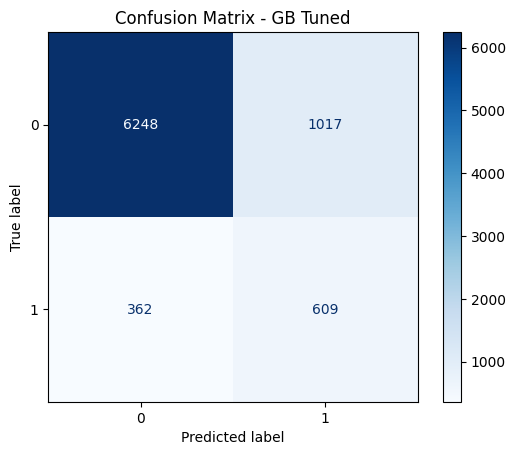

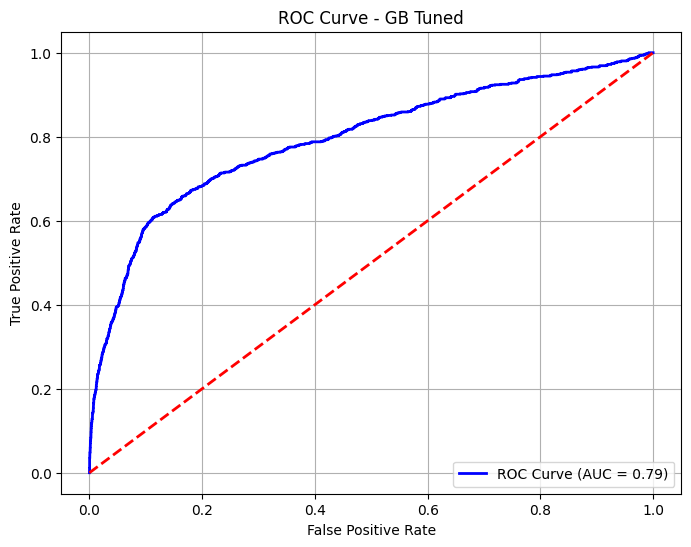

In [ ]:
# Confusion Matrix for the best LightGBM model
conf_matrix_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
disp_gb_tuned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb_tuned, display_labels=best_gb_model.classes_)
disp_gb_tuned.plot(cmap='Blues')
plt.title('Confusion Matrix - GB Tuned')
plt.show()

# ROC Curve for the best LightGBM model
fpr_gb_tuned, tpr_gb_tuned, thresholds_gb_tuned = roc_curve(y_test, y_pred_proba_gb_tuned)
roc_auc_gb_tuned = auc(fpr_gb_tuned, tpr_gb_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_tuned, tpr_gb_tuned, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_gb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GB Tuned')
plt.legend(loc='lower right')
plt.grid()
plt.show()

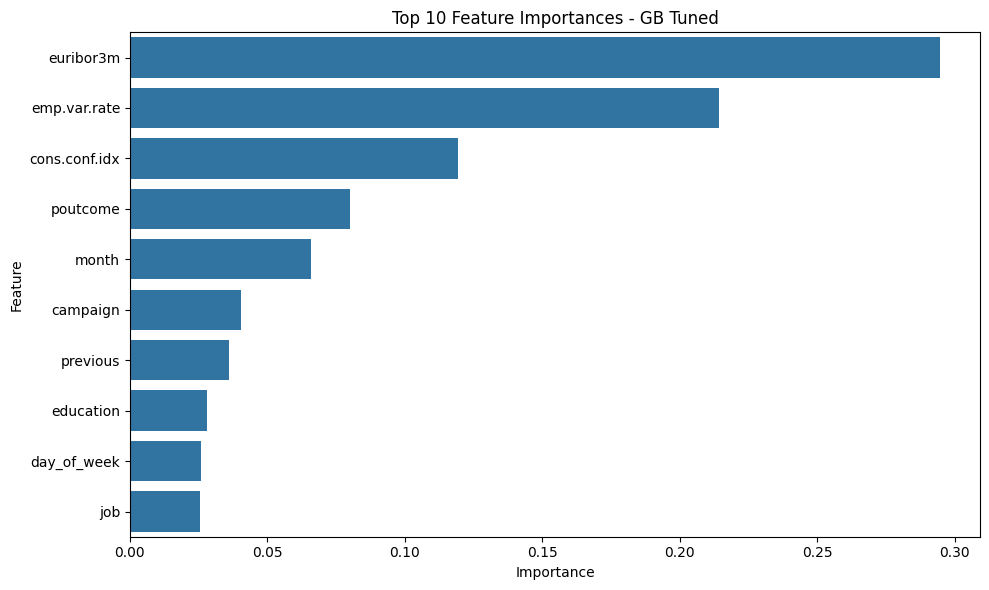

In [ ]:
# Feature importance from the GB Tuned
gb_tuned_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
gb_tuned_feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_tuned_feature_importance.head(10))
plt.title('Top 10 Feature Importances - GB Tuned')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model
  - Accuracy: 90.10%
  Model memprediksi dengan benar sekitar 90% dari data uji.
  - ROC AUC Score: 79.96%
  Model memiliki kemampuan yang cukup baik untuk membedakan antara kelas 0 dan 1.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 95%.
    Kelas 1 (berlangganan): 37%.
    - Recall:
    Kelas 0: 86% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 63% (rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 90%
    Kelas 1: 47%

2. Confusion Matrix
  - Interpretasi:
    - True Negatives (TN): 6248 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 1017 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 362 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 609 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve
  - Interpretasi:
    - Garis biru menunjukkan kinerja model, dengan AUC sebesar 0.79.
    - Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    - AUC sebesar 0.79 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur
  - Top 3 Fitur Penting:
    - euribor3m: Bank dapat meningkatkan peluang keberhasilan kampanye saat suku bunga rendah.
    - emp.var.rate: Bank dapat mengoptimalkan kampanye ketika tingkat variasi pekerjaan positif.
    - cons.conf.idx: Kampanye sebaiknya dilakukan saat indeks kepercayaan konsumen stabil atau meningkat.

## LGBM Tuning

In [ ]:
from collections import Counter

class_counts = Counter(y_train)  # Hitung distribusi kelas
scale_pos_weight = class_counts[0] / class_counts[1]  # Rasio negatif terhadap positif
print(f"Scale Pos Weight: {scale_pos_weight}")

Scale Pos Weight: 7.980370774263904


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Initialize the LightGBM model
lgbm_model_tuning = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Set up GridSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model_tuning,
    param_distributions=param_grid_lgbm,
    scoring='precision',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the search
random_search_lgbm.fit(X_train, y_train)

# Best parameters and score
best_params_lgbm = random_search_lgbm.best_params_
best_score_lgbm = random_search_lgbm.best_score_

# Train the best model on the training data
best_lgbm_model = random_search_lgbm.best_estimator_

# Make predictions using the best model
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test)
y_pred_proba_lgbm_tuned = best_lgbm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
from sklearn.metrics import classification_report

print("Best Parameters:", best_params_lgbm)
print("Best ROC AUC Score from Grid Search:", best_score_lgbm)
print("\nClassification Report for LGBM Tuned:")
print(classification_report(y_test, y_pred_lgbm_tuned))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 3668, number of negative: 29272
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 32940, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111354 -> initscore=-2.076985
[LightGBM] [Info] Start training from score -2.076985
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.5, 'num_leaves': 50, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best ROC AUC Score from Grid Search: 0.3854752040159963

Classification Report for LGBM Tuned:
              precision    recall  f1-score   support

           0       0.95      0.87 

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned LightGBM model
cv_scores = cross_val_score(lgbm_model_tuning, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Calculate the mean and standard deviation of the ROC AUC scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Display the results
print("Cross-Validation ROC AUC Scores:", cv_scores)
print(f"Mean Precision Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of ROC AUC Scores: {std_cv_score:.4f}")

Cross-Validation ROC AUC Scores: [0.81518635 0.78779777 0.7873277  0.78205324 0.80343874]
Mean Precision Score: 0.7952
Standard Deviation of ROC AUC Scores: 0.0123


In [ ]:
LGBMTCV = (cross_val_score(lgbm_model_tuning, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
LGBMTCV

[LightGBM] [Info] Number of positive: 3318, number of negative: 26328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.111921 -> initscore=-2.071271
[LightGBM] [Info] Start training from score -2.071271
[LightGBM] [Info] Number of positive: 3293, number of negative: 26353
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 335
[LightGBM] [Info] Number of data points in the train set: 29646, number of used features: 15
[LightGBM] [Info] [bin

0.8382817243472982

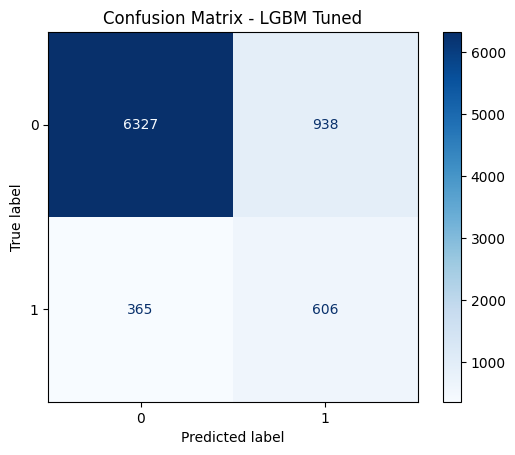

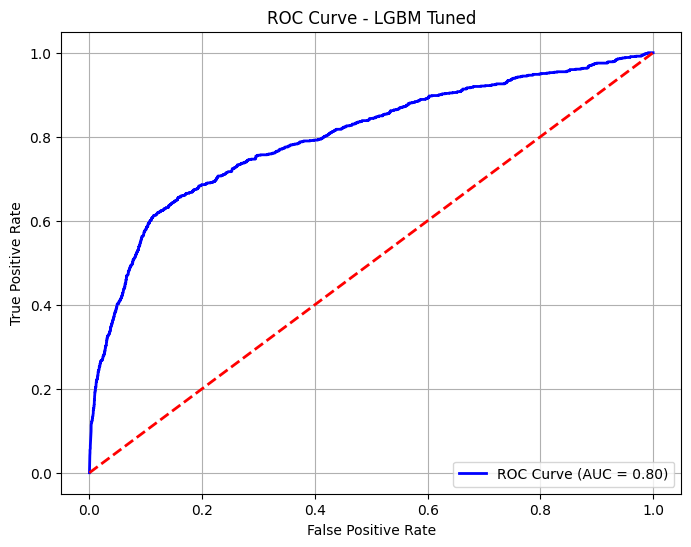

In [ ]:
# Confusion Matrix for the best LightGBM model
conf_matrix_lgbm_tuned = confusion_matrix(y_test, y_pred_lgbm_tuned)
disp_lgbm_tuned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lgbm_tuned, display_labels=best_lgbm_model.classes_)
disp_lgbm_tuned.plot(cmap='Blues')
plt.title('Confusion Matrix - LGBM Tuned')
plt.show()

# ROC Curve for the best LightGBM model
fpr_lgbm_tuned, tpr_lgbm_tuned, thresholds_gb_tuned = roc_curve(y_test, y_pred_proba_lgbm_tuned)
roc_auc_lgbm_tuned = auc(fpr_lgbm_tuned, tpr_lgbm_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm_tuned, tpr_lgbm_tuned, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc_lgbm_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LGBM Tuned')
plt.legend(loc='lower right')
plt.grid()
plt.show()

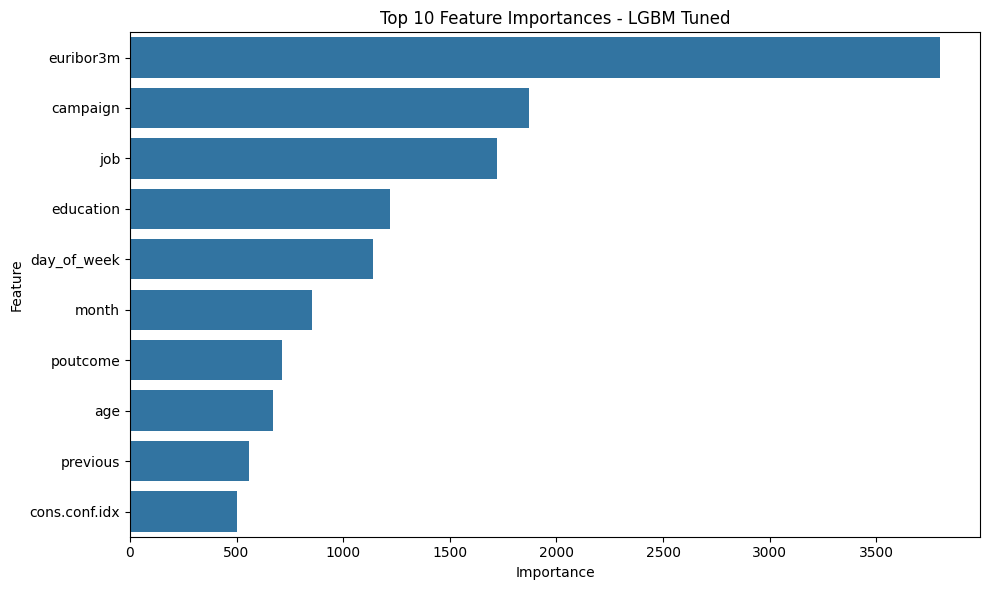

In [ ]:
# Feature importance from the best LightGBM model
lgbm_tuned_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_lgbm_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
lgbm_tuned_feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgbm_tuned_feature_importance.head(10))
plt.title('Top 10 Feature Importances - LGBM Tuned')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model

  - Accuracy: 83.82% Model memprediksi dengan benar sekitar 83% dari data uji.
  - ROC AUC Score: 79.52% Model memiliki kemampuan yang cukup baik untuk membedakan antara kelas 0 dan 1.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 94%.
    Kelas 1 (berlangganan): 45%.
    - Recall:
    Kelas 0: 91% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 56% (rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 92%
    Kelas 1: 50%

2. Confusion Matrix

  - Interpretasi:

    - True Negatives (TN): 6610 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 655 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 428 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 543 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve

  - Interpretasi:
    Garis biru menunjukkan kinerja model, dengan AUC sebesar 0.79.
    Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    AUC sebesar 0.79 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur

  - Top 3 Fitur Penting:
    - euribor3m: Bank dapat meningkatkan peluang keberhasilan kampanye saat suku bunga rendah.
    - campaign: Optimalkan jumlah kontak dengan pelanggan untuk menjaga tingkat keberhasilan.
    - job: Segmentasikan kampanye pemasaran berdasarkan jenis pekerjaan untuk meningkatkan konversi.

## XGBoost Tuning

In [ ]:
# Define the parameter grid for XGBoost
param_distributions_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.02, 0.05],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Initialize the XGBoost model
xgb_model_tuning = XGBClassifier(random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss')

# Set up GridSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_tuning,
    param_distributions=param_distributions_xgb,
    n_iter=100,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Perform the search
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

# Train the best model on the training data
best_xgb_model = random_search_xgb.best_estimator_

# Make predictions using the best model
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_pred_proba_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Best Parameters for XGBoost:", best_params_xgb)
print("Best ROC AUC Score from Grid Search for XGBoost:", best_score_xgb)
print("\nClassification Report for XGB Tuned:")
print(classification_report(y_test, y_pred_xgb_tuned))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.8}
Best ROC AUC Score from Grid Search for XGBoost: 0.8019198525406683

Classification Report for XGB Tuned:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7265
           1       0.38      0.64      0.47       971

    accuracy                           0.83      8236
   macro avg       0.66      0.75      0.69      8236
weighted avg       0.88      0.83      0.85      8236



In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the tuned LightGBM model
cv_scores = cross_val_score(xgb_model_tuning, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

# Calculate the mean and standard deviation of the ROC AUC scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Display the results
print("Cross-Validation ROC AUC Scores:", cv_scores)
print(f"Mean ROC AUC Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of ROC AUC Scores: {std_cv_score:.4f}")

Cross-Validation ROC AUC Scores: [0.77442013 0.76268683 0.76313362 0.75206571 0.77751269]
Mean ROC AUC Score: 0.7660
Standard Deviation of ROC AUC Scores: 0.0091


In [ ]:
XGBTCV = (cross_val_score(xgb_model_tuning, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
XGBTCV

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:28:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

0.8318154219793564

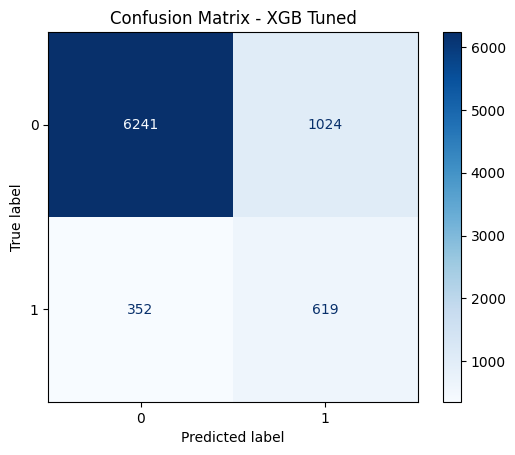

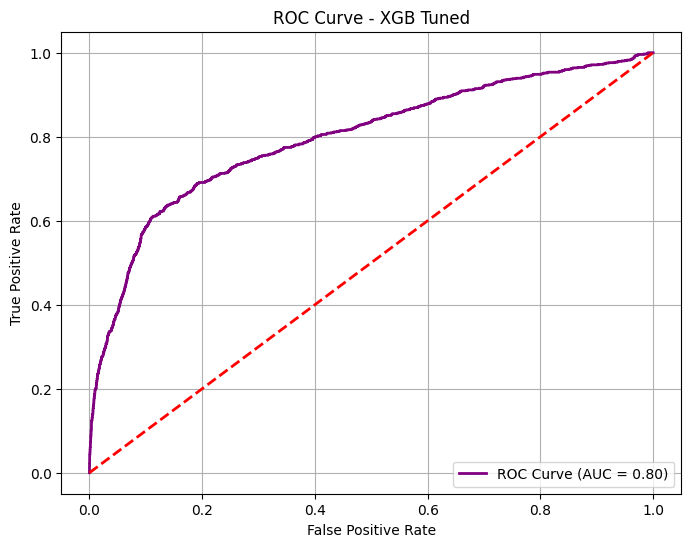

In [ ]:
# Confusion Matrix for the best XGBoost model
conf_matrix_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
disp_xgb_tuned = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb_tuned, display_labels=best_xgb_model.classes_)
disp_xgb_tuned.plot(cmap='Blues')
plt.title('Confusion Matrix - XGB Tuned')
plt.show()

# ROC Curve for the best XGBoost model
fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test, y_pred_proba_xgb_tuned)
roc_auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='purple', lw=2, label=f'ROC Curve (AUC = {roc_auc_xgb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGB Tuned')
plt.legend(loc='lower right')
plt.grid()
plt.show()

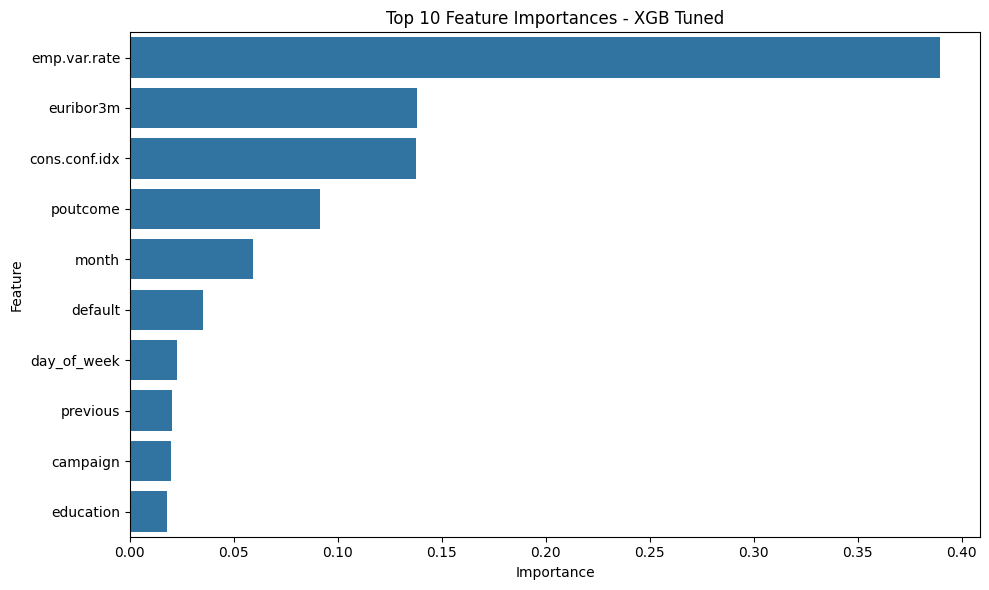

In [ ]:
# Feature importance from the best XGBoost model
xgb_tuned_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
xgb_tuned_feature_importance.head(10)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_tuned_feature_importance.head(10))
plt.title('Top 10 Feature Importances - XGB Tuned')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Kinerja Model

  - Accuracy: 83.18% Model memprediksi dengan benar sekitar 83% dari data uji.
  - ROC AUC Score: 76.60% Model memiliki kemampuan yang cukup baik untuk membedakan antara kelas 0 dan 1.
  - Classification Report:
    - Precision:
    Kelas 0 (tidak berlangganan): 95%.
    Kelas 1 (berlangganan): 38%.
    - Recall:
    Kelas 0: 86% (sangat baik untuk pelanggan yang tidak berlangganan).
    Kelas 1: 64% (rendah, model kesulitan menangkap pelanggan yang berlangganan).
    - F1-Score:
    Kelas 0: 90%
    Kelas 1: 47%

2. Confusion Matrix

  - Interpretasi:

    - True Negatives (TN): 6849 pelanggan yang benar diklasifikasikan sebagai tidak berlangganan.
    - False Positives (FP): 114 pelanggan yang salah diklasifikasikan sebagai berlangganan.
    - False Negatives (FN): 694 pelanggan yang salah diklasifikasikan sebagai tidak berlangganan.
    - True Positives (TP): 224 pelanggan yang benar diklasifikasikan sebagai berlangganan.

  - Insight:
    - Model sangat baik dalam mengidentifikasi kelas mayoritas (0 - tidak berlangganan).
    - Kelas minoritas (1 - berlangganan) memiliki FN yang cukup tinggi.

3. ROC Curve

  - Interpretasi:
    Garis ungu menunjukkan kinerja model, dengan AUC sebesar 0.76.
    Garis diagonal merah menunjukkan baseline (random classifier).

  - Insight:
    AUC sebesar 0.76 menunjukkan kemampuan model untuk membedakan antara kelas 0 dan 1.

4. Pentingnya Fitur

  - Top 3 Fitur Penting:
    - emp.var.rate: Bank dapat mengoptimalkan kampanye ketika tingkat variasi pekerjaan positif.
    - cons.conf.idx: Kampanye sebaiknya dilakukan saat indeks kepercayaan konsumen berada pada tingkat yang stabil atau meningkat.
    - euribor3m: Bank dapat meningkatkan peluang keberhasilan kampanye saat suku bunga rendah.

# Business Insight After Tuning

In [ ]:
# Prediksi dengan model Gradient Boosting
y_pred_rf = rf_model.predict(X_test)
predicted_positive_rf = (y_pred_rf == 1).sum()

# Prediksi dengan model Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
predicted_positive_gb = (y_pred_gb == 1).sum()

# Prediksi dengan model LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)
predicted_positive_lgbm = (y_pred_lgbm == 1).sum()

# Prediksi dengan model XGBoost
y_pred_xgb = xgb_model.predict(X_test)
predicted_positive_xgb = (y_pred_xgb == 1).sum()

# Prediksi dengan model Gradient Boosting
y_pred_gb_tuned = best_gb_model.predict(X_test)
predicted_positive_gb_tuned = (y_pred_gb_tuned == 1).sum()

# Prediksi dengan model LightGBM
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test)
predicted_positive_lgbm_tuned = (y_pred_lgbm_tuned == 1).sum()

# Prediksi dengan model XGBoost
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
predicted_positive_xgb_tuned = (y_pred_xgb_tuned == 1).sum()

# Simpan hasil dalam DataFrame
results = {
    "Model": ["Random Forest", "Gradient Boosting", "LightGBM", "XGBoost", "GB Tuned", "LGBM Tuned", "XGB Tuned"],
    "Predicted_Positive": [predicted_positive_rf, predicted_positive_gb, predicted_positive_lgbm, predicted_positive_xgb, predicted_positive_gb_tuned, predicted_positive_lgbm_tuned, predicted_positive_xgb_tuned],
}

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               Model  Predicted_Positive
0      Random Forest                 501
1  Gradient Boosting                 280
2           LightGBM                 289
3            XGBoost                 273
4           GB Tuned                1626
5         LGBM Tuned                1544
6          XGB Tuned                1643


In [ ]:
unique, counts = np.unique(y_pred_gb, return_counts=True)
print(dict(zip(unique, counts)))  # Hasil: {0: ..., 1: 3247}

{0: 7956, 1: 280}


In [ ]:
# Hitung Confusion Matrix dan TP untuk setiap model
_, _, _, tp_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned).ravel()
_, _, _, tp_lgbm_tuned = confusion_matrix(y_test, y_pred_lgbm_tuned).ravel()
_, _, _, tp_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned).ravel()

profit_gb_tuned = (tp_gb_tuned * revenue_per_customer) - (predicted_positive_gb_tuned * cost_per_customer)
profit_lgbm_tuned = (tp_lgbm_tuned * revenue_per_customer) - (predicted_positive_lgbm_tuned * cost_per_customer)
profit_xgb_tuned = (tp_xgb_tuned * revenue_per_customer) - (predicted_positive_xgb_tuned * cost_per_customer)

# Simpan hasil dalam DataFrame
results = {
    "Model": ["Random Forest", "Gradient Boosting", "LightGBM", "XGBoost", "GB Tuned", "LGBM Tuned", "XGB Tuned"],
    "True Positives": [tp_rf, tp_gb, tp_lgbm, tp_xgb, tp_gb_tuned, tp_lgbm_tuned, tp_xgb_tuned],
    "Predicted_Positive": [predicted_positive_rf, predicted_positive_gb, predicted_positive_lgbm, predicted_positive_xgb, predicted_positive_gb_tuned, predicted_positive_lgbm_tuned, predicted_positive_xgb_tuned],
    "Profit": [profit_rf, profit_gb, profit_lgbm, profit_xgb, profit_gb_tuned, profit_lgbm_tuned, profit_xgb_tuned],
}

df_results = pd.DataFrame(results)

# Tampilkan hasil
print(df_results)

               Model  True Positives  Predicted_Positive  Profit
0      Random Forest             261                 501   21090
1  Gradient Boosting             200                 280   17200
2           LightGBM             203                 289   17410
3            XGBoost             196                 273   16870
4           GB Tuned             609                1626   44640
5         LGBM Tuned             606                1544   45160
6          XGB Tuned             619                1643   45470


In [ ]:
# Hitung Conversion Rate untuk setiap model
conversion_rate_rf = (tp_rf / predicted_positive_rf) * 100 if predicted_positive_rf > 0 else 0
conversion_rate_gb = (tp_gb / predicted_positive_gb) * 100 if predicted_positive_gb > 0 else 0
conversion_rate_lgbm = (tp_lgbm / predicted_positive_lgbm) * 100 if predicted_positive_lgbm > 0 else 0
conversion_rate_xgb = (tp_xgb / predicted_positive_xgb) * 100 if predicted_positive_xgb > 0 else 0
conversion_rate_gb_tuned = (tp_gb_tuned / predicted_positive_gb_tuned) * 100 if predicted_positive_gb_tuned > 0 else 0
conversion_rate_lgbm_tuned = (tp_lgbm_tuned / predicted_positive_lgbm_tuned) * 100 if predicted_positive_lgbm_tuned > 0 else 0
conversion_rate_xgb_tuned = (tp_xgb_tuned / predicted_positive_xgb_tuned) * 100 if predicted_positive_xgb_tuned > 0 else 0

# Tambahkan Conversion Rate ke hasil
results["Conversion Rate (%)"] = [
    conversion_rate_rf,
    conversion_rate_gb,
    conversion_rate_lgbm,
    conversion_rate_xgb,
    conversion_rate_gb_tuned,
    conversion_rate_lgbm_tuned,
    conversion_rate_xgb_tuned,
]

# Simpan ke DataFrame
df_results = pd.DataFrame(results)
df_results

,Model,True Positives,Predicted_Positive,Profit,Conversion Rate (%)
0,Random Forest,261,501,21090,52.095808
1,Gradient Boosting,200,280,17200,71.428571
2,LightGBM,203,289,17410,70.242215
3,XGBoost,196,273,16870,71.794872
4,GB Tuned,609,1626,44640,37.453875
5,LGBM Tuned,606,1544,45160,39.248705
6,XGB Tuned,619,1643,45470,37.674985


In [ ]:
insight = {
    "Model": ["Gradient Boosting", "LightGBM", "XGBoost", "GB Tuned", "LGBM Tuned", "XGB Tuned"],
    "True Positives": [tp_gb, tp_lgbm, tp_xgb, tp_gb_tuned, tp_lgbm_tuned, tp_xgb_tuned],
    "Predicted_Positive": [predicted_positive_gb, predicted_positive_lgbm, predicted_positive_xgb, predicted_positive_gb_tuned, predicted_positive_lgbm_tuned, predicted_positive_xgb_tuned],
    "Profit": [profit_gb, profit_lgbm, profit_xgb, profit_gb_tuned, profit_lgbm_tuned, profit_xgb_tuned],
    "Conversion Rate (%)": [conversion_rate_gb, conversion_rate_lgbm, conversion_rate_xgb, conversion_rate_gb_tuned, conversion_rate_lgbm_tuned, conversion_rate_xgb_tuned]
}

df = pd.DataFrame(insight)

# Kenaikan Conversion Rate dan Profit
comparisons = [
    {"from_model": "Gradient Boosting", "to_model": "GB Tuned"},
    {"from_model": "LightGBM", "to_model": "LGBM Tuned"},
    {"from_model": "XGBoost", "to_model": "XGB Tuned"},
]

results = []
for comparison in comparisons:
    from_model = comparison["from_model"]
    to_model = comparison["to_model"]

    # Filter data untuk kedua model
    from_row = df[df["Model"] == from_model].iloc[0]
    to_row = df[df["Model"] == to_model].iloc[0]

    # Hitung persentase kenaikan Conversion Rate dan Profit
    conversion_rate_increase = ((to_row["Conversion Rate (%)"] - from_row["Conversion Rate (%)"]) / from_row["Conversion Rate (%)"]) * 100
    profit_increase = ((to_row["Profit"] - from_row["Profit"]) / from_row["Profit"]) * 100

    # Simpan hasil
    results.append({
        "From Model": from_model,
        "To Model": to_model,
        "Conversion Rate Increase (%)": conversion_rate_increase,
        "Profit Increase (%)": profit_increase,
    })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
results_df

,From Model,To Model,Conversion Rate Increase (%),Profit Increase (%)
0,Gradient Boosting,GB Tuned,-47.564576,159.534884
1,LightGBM,LGBM Tuned,-44.123765,159.391155
2,XGBoost,XGB Tuned,-47.524128,169.531713


# Best Model

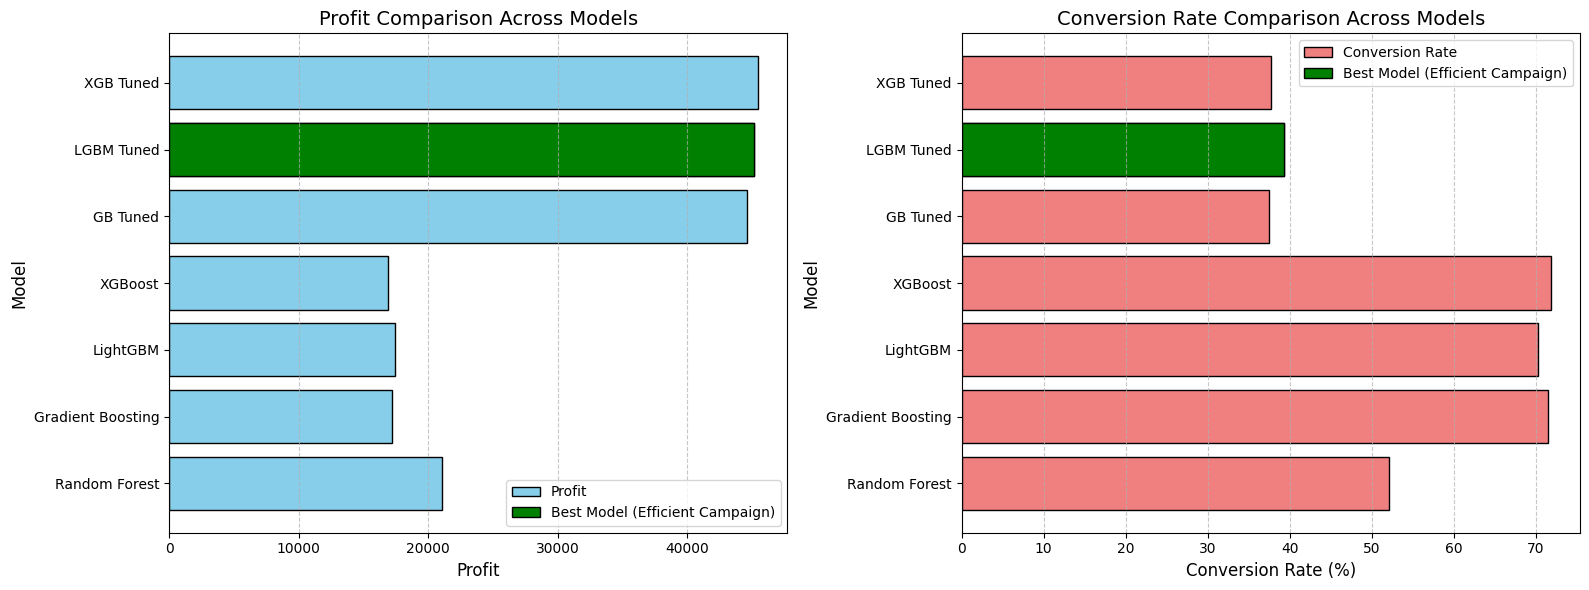

In [ ]:
# Visualisasi untuk model terbaik berdasarkan Profit dan Conversion Rate

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart untuk Profit
axes[0].barh(df_results["Model"], df_results["Profit"], color='skyblue', edgecolor='black', label="Profit")
axes[0].barh("LGBM Tuned", df_results.loc[df_results["Model"] == "LGBM Tuned", "Profit"], color='green', edgecolor='black', label="Best Model (Efficient Campaign)")
axes[0].set_title("Profit Comparison Across Models", fontsize=14)
axes[0].set_xlabel("Profit", fontsize=12)
axes[0].set_ylabel("Model", fontsize=12)
axes[0].legend()
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Bar chart untuk Conversion Rate
axes[1].barh(df_results["Model"], df_results["Conversion Rate (%)"], color='lightcoral', edgecolor='black', label="Conversion Rate")
axes[1].barh("LGBM Tuned", df_results.loc[df_results["Model"] == "LGBM Tuned", "Conversion Rate (%)"], color='green', edgecolor='black', label="Best Model (Efficient Campaign)")
axes[1].set_title("Conversion Rate Comparison Across Models", fontsize=14)
axes[1].set_xlabel("Conversion Rate (%)", fontsize=12)
axes[1].set_ylabel("Model", fontsize=12)
axes[1].legend()
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# SHAP

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


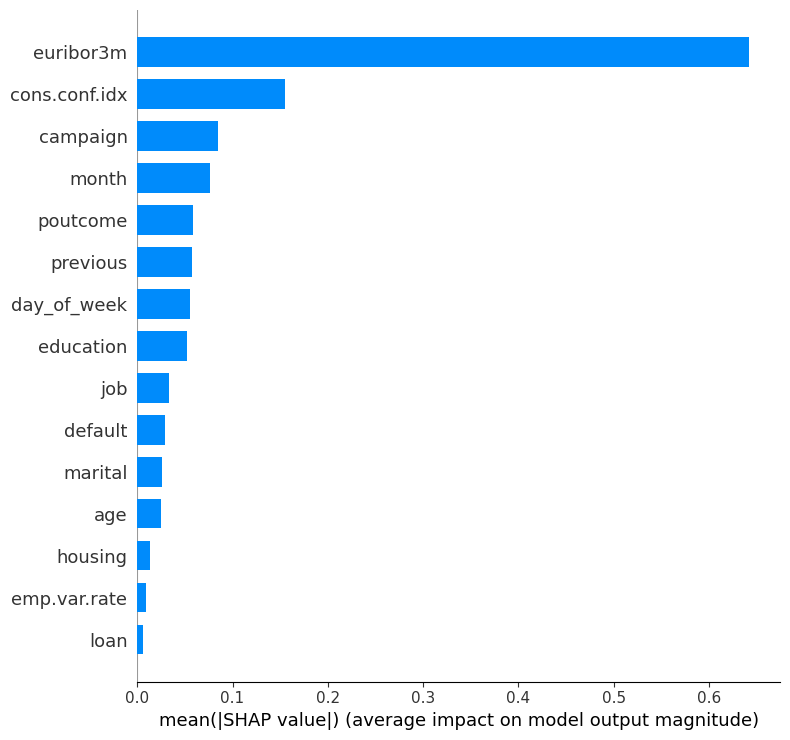

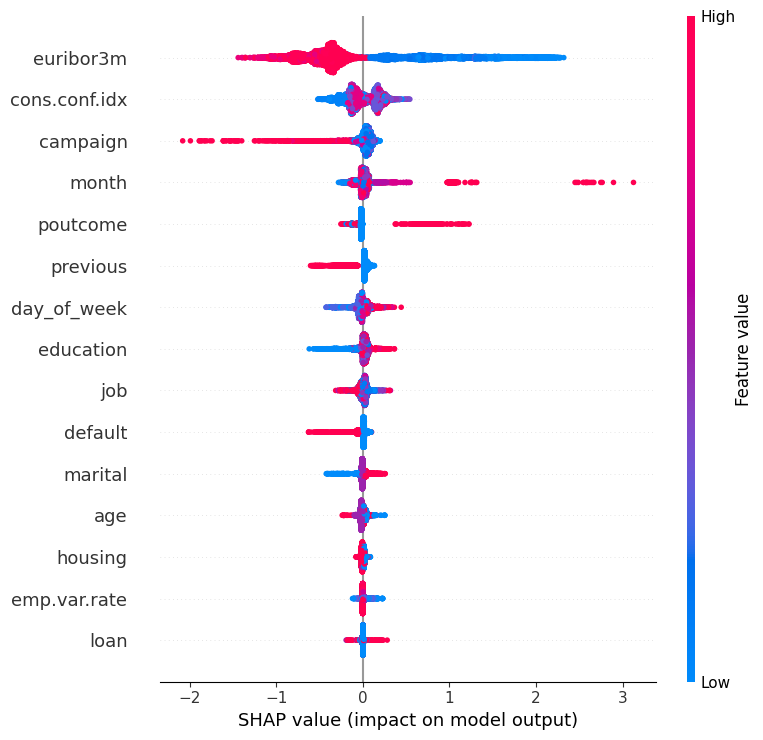

In [ ]:
import shap

import shap

# Pastikan model LightGBM Tuned sudah ada: best_lgbm_model
# Buat SHAP explainer untuk LGBM Tuned
shap_explainer = shap.TreeExplainer(best_lgbm_model)

# Hitung SHAP values untuk data uji
shap_values = shap_explainer.shap_values(X_test)

# Pastikan shap_values adalah daftar, pilih indeks untuk kelas positif
if isinstance(shap_values, list):
    shap_values_class_1 = shap_values[1]  # Kelas positif
else:
    shap_values_class_1 = shap_values  # Jika keluaran bukan daftar

# Summary Plot (Bar)
shap.summary_plot(shap_values_class_1, X_test, plot_type="bar", show=True)

# Summary Plot (Beeswarm)
shap.summary_plot(shap_values_class_1, X_test, show=True)

1. Feature Importance (Bar Plot):
  - Euribor3m adalah fitur paling signifikan, menunjukkan kondisi pasar keuangan memiliki dampak besar pada keputusan pelanggan.
  - Consumer Confidence Index (cons.conf.idx) berada di peringkat kedua, mencerminkan pengaruh kuat dari sentimen pasar terhadap kemungkinan berlangganan.
  - Employment Variation Rate (emp.var.rate) juga menjadi fitur utama, mengindikasikan bahwa stabilitas pekerjaan memainkan peran penting.
  - Month dan Campaign menunjukkan bahwa waktu kampanye dan frekuensi kontak memiliki dampak signifikan, meskipun lebih kecil dari tiga fitur utama di atas.

2. SHAP Beeswarm Plot:
  - Warna merah menunjukkan nilai fitur tinggi, dan biru menunjukkan nilai rendah.
  - Euribor3m:
  Nilai tinggi (merah) memiliki dampak negatif pada prediksi (mengurangi kemungkinan pelanggan berlangganan).
  - Cons.conf.idx:
  Nilai tinggi berdampak positif pada kemungkinan pelanggan untuk berlangganan.
  - Emp.var.rate:
  Variasi pekerjaan tertentu memiliki dampak besar, baik positif maupun negatif, tergantung pada nilai spesifiknya.
  - Month:
  Bulan tertentu lebih efektif untuk kampanye pemasaran.
  - Campaign:
  Frekuensi kontak yang tinggi dapat berdampak negatif, menunjukkan adanya batas atas efektivitas kampanye.

# Action Recommendation

1. Target Berdasarkan Kondisi Pasar (Euribor3m):
  - Fokuskan kampanye pada saat Euribor3m rendah, karena kondisi pasar keuangan yang stabil lebih mungkin meningkatkan tingkat konversi pelanggan.
  - Monitor kondisi keuangan secara berkala untuk menentukan waktu terbaik menjalankan kampanye.

2. Optimalkan Kepercayaan Konsumen (Cons.conf.idx):
  - Kampanye harus diintensifkan saat Consumer Confidence Index tinggi.
  - Tinjau data sentimen konsumen secara berkala untuk menyesuaikan strategi kampanye.

3. Analisis Stabilitas Ekonomi (Emp.var.rate):
  - Pastikan kampanye dijalankan saat variasi pekerjaan stabil, karena kondisi pasar tenaga kerja yang baik lebih cenderung meningkatkan minat pelanggan.

4. Strategi Musiman (Month):
  - Analisis lebih lanjut diperlukan untuk menentukan bulan mana yang paling efektif berdasarkan pola perilaku pelanggan.
  - Sesuaikan frekuensi kampanye dengan bulan-bulan yang menunjukkan dampak positif.

5. Frekuensi Kampanye (Campaign):
  - Hindari menghubungi pelanggan terlalu sering, karena kampanye yang terlalu agresif dapat berdampak negatif.
  - Gunakan segmentasi pelanggan untuk mengoptimalkan jumlah kontak.

6. Segmen Pelanggan Berdasarkan Data Historis (Poutcome, Previous):
  - Gunakan data hasil kampanye sebelumnya untuk menargetkan pelanggan yang memiliki riwayat respons positif.
  - Hindari pelanggan yang telah berulang kali tidak merespons dengan positif.

# Strategic Recommendation

1. Fokuskan kampanye pada segmen pelanggan yang berada di kondisi pasar yang menguntungkan (Euribor3m rendah, cons.conf.idx tinggi).
2. Gunakan pendekatan musiman dan segmentasi berdasarkan data historis untuk meningkatkan efektivitas.
3. Kurangi frekuensi kampanye pada segmen tertentu untuk menghindari kejenuhan pelanggan.

# Model Deployment with Gradio

In [ ]:
import gradio as gr

# Define a prediction function using the best LGBM model
def predict_lgbm_tuned(
    age, job, marital, education, default, housing, loan,
    month, day_of_week, campaign, previous, poutcome,
    emp_var_rate, cons_conf_idx, euribor3m,
):
    # Prepare the input data as a single-row DataFrame
    input_data = pd.DataFrame({
        'age': [age],
        'job': [job],
        'marital': [marital],
        'education': [education],
        'default': [default],
        'housing': [housing],
        'loan': [loan],
        'month': [month],
        'day_of_week': [day_of_week],
        'campaign': [campaign],
        'previous': [previous],
        'poutcome': [poutcome],
        'emp.var.rate': [emp_var_rate],
        'cons.conf.idx': [cons_conf_idx],
        'euribor3m': [euribor3m],
    })

    # Apply any necessary preprocessing (e.g., one-hot encoding)
    input_data_encoded = pd.get_dummies(input_data, columns=categorical_columns, drop_first=True)
    input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

    # Make a prediction
    prediction = best_lgbm_model.predict(input_data_encoded)[0]
    prediction_proba = best_lgbm_model.predict_proba(input_data_encoded)[0][1]

    # Return the result
    return f"Prediction: {'Subscribed' if prediction == 1 else 'Not Subscribed'} (Probability: {prediction_proba:.2f})"

# Define input components for the Gradio interface
inputs = [
    gr.Number(label="Age"),
    gr.Textbox(label="Job"),
    gr.Textbox(label="Marital Status"),
    gr.Textbox(label="Education"),
    gr.Textbox(label="Default (yes/no)"),
    gr.Textbox(label="Housing Loan (yes/no)"),
    gr.Textbox(label="Personal Loan (yes/no)"),
    gr.Textbox(label="Month"),
    gr.Textbox(label="Day of Week"),
    gr.Number(label="Campaign"),
    gr.Number(label="Previous"),
    gr.Textbox(label="Poutcome"),
    gr.Number(label="Employment Variation Rate"),
    gr.Number(label="Consumer Confidence Index"),
    gr.Number(label="Euribor 3-Month Rate"),
]

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_lgbm_tuned,
    inputs=inputs,
    outputs=gr.Textbox(label="Model Prediction"),
    title="LGBM Tuning Model Prediction",
    description="Input customer details to predict subscription likelihood."
)

# Launch the Gradio app
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a3d794787ad83b1ea5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                       'month', 'day_of_week', 'poutcome']

In [ ]:
# Example input
example_input = {
    'age': 35,
    'job': 'admin.',
    'marital': 'married',
    'education': 'university.degree',
    'default': 'no',
    'housing': 'yes',
    'loan': 'no',
    'month': 'may',
    'day_of_week': 'thu',
    'campaign': 2,
    'previous': 0,
    'poutcome': 'nonexistent',
    'emp.var.rate': -1.8,
    'cons.conf.idx': -36.4,
    'euribor3m': 1.344,
}

# Convert input to DataFrame
input_data = pd.DataFrame([example_input])

# Encode categorical variables
input_data_encoded = pd.get_dummies(input_data, columns=categorical_columns, drop_first=True)

# Align columns with training data
input_data_encoded = input_data_encoded.reindex(columns=X_train.columns, fill_value=0)

print(input_data_encoded.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'campaign', 'previous', 'poutcome'],
      dtype='object')


In [ ]:
# Predict using the best LGBM model
prediction = best_lgbm_model.predict(input_data_encoded)[0]
prediction_proba = best_lgbm_model.predict_proba(input_data_encoded)[0][1]

print(f"Prediction: {'Subscribed' if prediction == 1 else 'Not Subscribed'} (Probability: {prediction_proba:.2f})")

Prediction: Subscribed (Probability: 0.67)


In [ ]:
print(input_data_encoded.columns)
print(X_train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'campaign', 'previous', 'poutcome'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'month', 'day_of_week', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'campaign', 'previous', 'poutcome'],
      dtype='object')


Terima Kasih

By : Ghazy Rafif Agustian